In [1]:
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotagem de gráficos
import seaborn as sns  # Para plotagem de gráficos avançados
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
from matplotlib.ticker import FuncFormatter
import numpy as np


# Importando as métricas e funções de avaliação do scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize, StandardScaler

# Importando os modelos de machine learning do scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.neighbors import KNeighborsClassifier  # K-Vizinhos Mais Próximos
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




ModuleNotFoundError: No module named 'pandas'

In [3]:
# Define o número máximo de colunas e a largura máxima das colunas para None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Carrega os dados de um arquivo CSV em um DataFrame.
var_dfPrincipal = pd.read_csv(r"C:\Users\gustavo.belini_corte\Desktop\Pessoal\Facens\TCC\INFLUD23-26-02-2024 - 274mil linhas.csv", delimiter=';')

C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\273862232.py:2: DtypeWarning: Columns (15,18,20,23,53,59,61,63,72,74,79,91,93,109,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  var_dfPrincipal = pd.read_csv(r"C:\Users\gustavo.belini_corte\Desktop\Pessoal\Facens\TCC\INFLUD23-26-02-2024 - 274mil linhas.csv", delimiter=';')


# Análise Exploratória

In [5]:
var_dfPrincipal.shape

(277304, 190)

In [6]:
#Exibe as 5 primeiras linhas
var_dfPrincipal.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV,CO_DETEC,VG_OMS,VG_OMSOUT,VG_LIN,VG_MET,VG_METOUT,VG_DTRES,VG_ENC,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG
0,08/02/2023,6,23/01/2023,4,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,2250225,M,01/07/1941,81,3,3081,6,1.0,1.0,BRASIL,1,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,1.0,CA PROSTATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,01/02/2023,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,5.0,ESPESSAMENTO DE PAREDES BRONQU,01/02/2023,1.0,08/02/2023,1.0,NaN,1.0,10/02/2023,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,3.0,02/03/2023,02/03/2023,08/02/2023,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16/03/2021,13/04/2021,28/10/2021,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,210051,210132,FG3531,2.0,07/06/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD316Z,9.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27/02/2023,9,25/02/2023,8,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,15245,M,03/12/2022,2,2,2002,6,4.0,5.0,BRASIL,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,1.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,25/02/2023,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,2.0,NaN,NaN,3.0,6.0,NaN,NaN,1.0,27/02/2023,1.0,NaN,1.0,03/03/2023,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,1.0,09/03/2023,13/03/2023,27/02/2023,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17/03/2023,11,12/03/2023,11,SP,GVE XVI BOTUCATU,1341.0,

In [7]:
var_dfPrincipal.describe()

,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,MAE_VAC,M_AMAMENTA,ANTIVIRAL,TP_ANTIVIR,HOSPITAL,UTI,SUPORT_VEN,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,PCR_FLUBLI,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,CLASSI_FIN,CRITERIO,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,TP_AM_SOR,TP_SOR,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,TIPO_TRAT,DT_TRT_COV,CO_DETEC,VG_OMS,VG_MET,VG_ENC,VG_REINF,REINF,TABAG
count,277304.000000,277304.000000,242285.000000,277304.000000,2.773040e+05,277304.000000,277304.000000,277304.000000,277303.000000,277235.000000,254564.000000,168770.000000,243810.000000,233215.000000,238007.000000,252221.000000,199312.000000,240213.000000,232213.000000,226338.000000,197620.000000,199871.000000,194889.000000,79376.000000,277303.000000,94492.000000,80731.000000,80373.000000,80177.000000,85546.000000,89029.000000,84137.000000,83856.000000,82697.000000,81567.000000,80112.000000,94312.000000,148822.000000,16674.000000,15551.000000,224953.000000,16482.000000,269689.000000,243509.000000,241973.000000,269985.000000,253153.000000,254314.000000,65867.000000,8929.000000,5599.000000,2040.000000,72840.000000,23539.0,289.0,130.0,1819.0,147.0,2665.0,3344.0,1128.0,14719.0,2173.0,266514.000000,257870.000000,277302.0,0.0,0.0,0.0,0.0,0.0,21902.0,195269.000000,200601.000000,192757.000000,192560.000000,165709.000000,247860.000000,28540.000000,4424.000000,32810.000000,22787.0,5415.0,50.0,11.0,59.0,63.0,377.0,9503.000000,4226.000000,23801.000000,24044.000000,23319.000000,254602.000000,277242.000000,277302.000000,206970.000000,1044.000000,0.0,158641.000000,931.000000,1426.000000,1152.000000,0.0,268198.0,0.0
mean,24.572206,24.080121,1561.002951,346403.036382,3.191444e+06,32.252925,2.750426,5.843215,3.395989,346112.597821,1.195181,2.626782,2.260162,3.066347,1.389972,1.212068,2.062099,1.305862,1.318173,1.422306,1.988255,1.937039,1.735054,2.074128,1.551112,1.571699,2.058936,2.054832,2.069035,1.859818,1.742601,1.912250,1.918265,1.987992,1.996322,2.044750,1.513328,5.297261,6.425333,4.561443,2.758381,1.118857,1.032193,1.778066,2.391168,1.058470,1.173843,2.427759,1.964459,1.372942,2.056796,2.827451,1.091214,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.659425,1.114887,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.114678,1.933988,2.295273,2.296754,5.663519,3.261426,2.297933,1.375000,1.203779,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.056929,1.589920,4.191421,4.152013,4.250997,1.992341,1.603880,1.957865,3.061535,2.592912,NaN,2.773640,3.258861,2.286816,2.590278,NaN,2.0,NaN
std,13.843578,13.877651,654.252137,92254.466291,2.384920e+06,33.163194,0.459757,0.668316,2.652596,92304.353536,0.975762,2.106036,1.413091,2.518332,0.810230,0.677870,1.292232,0.787581,0.775932,0.888273,0.882600,0.900403,1.143016,0.763447,0.497382,0.845127,0.825351,0.761835,0.815153,0.854011,0.827221,0.844803,0.875738,0.850236,0.821657,0.961717,0.904802,3.633420,3.467282,3.816574,2.313021,0.468416,0.362857,0.908989,1.263832,0.413027,0.735879,1.463865,0.913880,0.483614,1.258195,0.702152,0.346119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.122959,0.417779,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.197020,1.135891,1.453860,1.455663,1.745829,1.603939,1.799857,0.484178,0.864701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.687775,1.145956,1.353798,1.375349,1.320660,0.087180,1.101915,0.200896,2.532192,0.766001,NaN,2.232637,2.825882,1.166699,1.833801,NaN,0.0,NaN
min,1.000000,1.000000,1331.000000,110002.000000,3.500000e+01,-5.000000,1.000000,0.000000,1.000000,110001.000000,1.000000,1.0

In [8]:
classes_obj = var_dfPrincipal['CLASSI_FIN']
classes_obj.describe()

count    266514.000000
mean          3.659425
std           1.122959
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: CLASSI_FIN, dtype: float64

In [9]:
print('Classes e quantidade:', Counter(var_dfPrincipal['CLASSI_FIN']))

Classes e quantidade: Counter({4.0: 151560, 5.0: 49647, 2.0: 48390, 1.0: 13359, 3.0: 3558, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

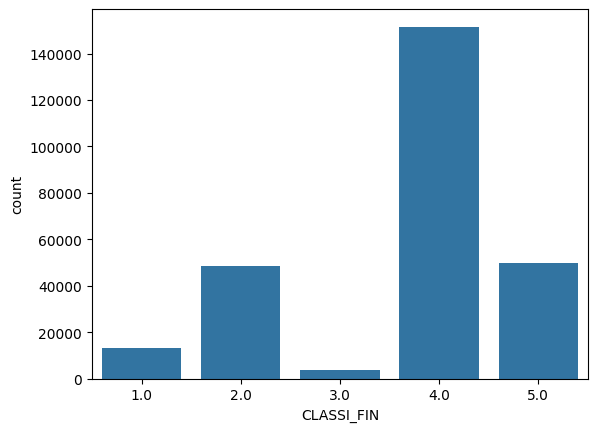

In [10]:
# Quantidade de itens de cada classe
sns.countplot(x="CLASSI_FIN", data=var_dfPrincipal)

plt.show()

Porcentagem do valores

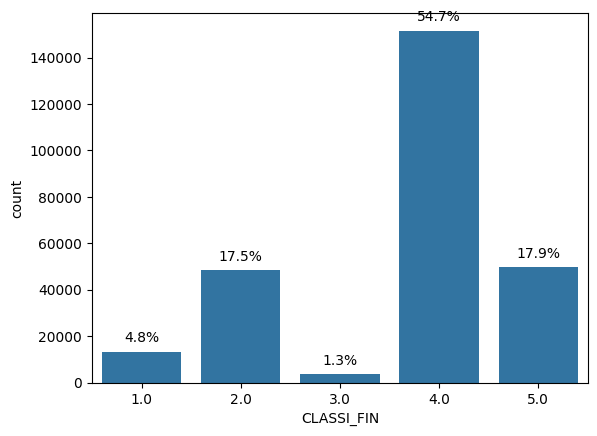

In [11]:
# Suponha que 'var_dfPrincipal' seja o DataFrame e 'CLASSI_FIN' seja a coluna de interesse
total = len(var_dfPrincipal)  # Total de itens

# Contando a quantidade de itens em cada classe e calculando a porcentagem
ax = sns.countplot(x="CLASSI_FIN", data=var_dfPrincipal)

# Convertendo os valores de contagem para porcentagens
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Exibindo o gráfico
plt.show()

Quantidade de cada classe
- 4.0 -> 151560
- 5.0 -> 49647
- 2.0 -> 48390
- 1.0 -> 13359
- 3.0 -> 3558

In [12]:
# Calcula a porcentagem de valores nulos em cada coluna.
var_floatPorcentagemNulo = var_dfPrincipal.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
var_srColunasAltaPorcentagemNulo = var_floatPorcentagemNulo[var_floatPorcentagemNulo > 80]
print(var_srColunasAltaPorcentagemNulo)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos.
var_dfColunasAltaPorcentagemNulo = pd.DataFrame(var_srColunasAltaPorcentagemNulo, columns=['Porcentagem de Nulos'])

# Exibe o novo DataFrame.
print(var_dfColunasAltaPorcentagemNulo)

OBES_IMC       99.766321
MORB_DESC      81.270014
DT_UT_DOSE     96.427026
MAE_VAC        93.987104
DT_VAC_MAE     99.789401
                 ...    
FAB_RE_BI      92.585394
DOSE_ADIC      98.195843
DOS_RE_BI      92.580345
LOTE_ADIC      98.218201
TABAG         100.000000
Length: 84, dtype: float64
            Porcentagem de Nulos
OBES_IMC               99.766321
MORB_DESC              81.270014
DT_UT_DOSE             96.427026
MAE_VAC                93.987104
DT_VAC_MAE             99.789401
...                          ...
FAB_RE_BI              92.585394
DOSE_ADIC              98.195843
DOS_RE_BI              92.580345
LOTE_ADIC              98.218201
TABAG                 100.000000

[84 rows x 1 columns]


In [13]:
# Colunas com mais de 80% dos dados nulos
var_dfColunasAltaPorcentagemNulo.sort_values(by='Porcentagem de Nulos')

,Porcentagem de Nulos
MORB_DESC,81.270014
DOSE_2REF,82.651891
FAB_COVRF2,82.680380
LOTE_REF2,82.691919
DT_SAIDUTI,84.037014
...,...
DT_RT_VGM,100.000000
PAIS_VGM,100.000000
DT_TRT_COV,100.000000
VG_REINF,100.000000


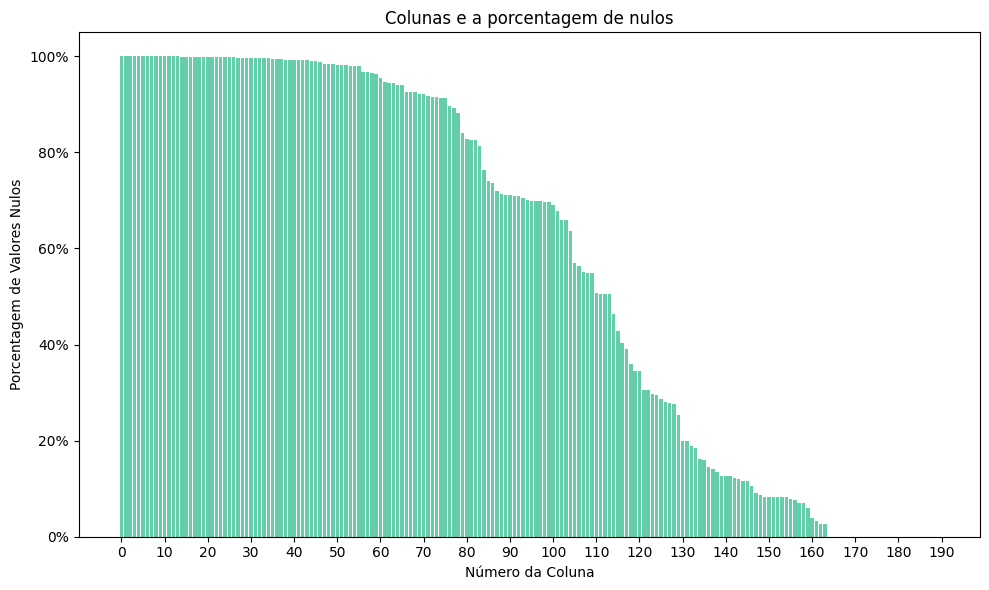

In [14]:


# Cria um gráfico de barras mostrando a quantidade de nulos que cada coluna tem
var_intNumeroNulos = (var_dfPrincipal.isnull().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# Define os números para o eixo X (de 0 a 190, com passo de 1)
x_positions = range(len(var_intNumeroNulos))

# Plota o gráfico, mas usando números no eixo X
plt.bar(x_positions, var_intNumeroNulos, color='mediumaquamarine')

plt.title('Colunas e a porcentagem de nulos')
plt.xlabel('Número da Coluna')
plt.ylabel('Porcentagem de Valores Nulos')

# Define os ticks do eixo X de 0 até 190, avançando de 10 em 10
plt.xticks(ticks=range(0, 191, 10), labels=range(0, 191, 10))

# Função para adicionar o símbolo de % ao eixo Y
def add_percent(x, pos):
    return f'{x:.0f}%'

# Aplica o formatter para o eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(add_percent))

plt.tight_layout()
plt.show()



In [15]:
# Mostrando os nulos da coluna target
var_dfPrincipal['CLASSI_FIN'].isna().mean()

np.float64(0.03891036551942994)

In [16]:
# Quantidade de linhas duplicadas
var_dfPrincipal.duplicated().sum()

np.int64(196)

# Cleaning

removendo as colunas que tem mais de 80% dos dados nulos

In [17]:
# Cria uma cópia do DataFrame principal para evitar modificar o original.
var_dfCopia = var_dfPrincipal.copy()

# Calcula a porcentagem de valores nulos em cada coluna no DataFrame copiado.
var_srColunasAltaPorcentagemNulo = var_dfCopia.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
columns_to_drop = var_srColunasAltaPorcentagemNulo[var_srColunasAltaPorcentagemNulo > 80].index.tolist()
# print(columns_to_drop)  # Descomente esta linha para verificar as colunas que serão removidas.

# Remove as colunas selecionadas do DataFrame copiado.
var_dfCopia.drop(columns=columns_to_drop, inplace=True)

# Exibe um resumo das informações do DataFrame copiado após a remoção das colunas,
# incluindo o tipo de dados e o número de valores não nulos em cada coluna.
var_dfCopia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 106 entries, DT_NOTIFIC to REINF
dtypes: float64(55), int64(7), object(44)
memory usage: 224.3+ MB


In [18]:
# Retirando os nulos da coluna de classificação final
var_dfFiltrada = var_dfCopia.dropna(subset=['CLASSI_FIN']).copy()

In [19]:
# Verificando a quantidade de nulos das colunas, ordenando do maior para o menor
var_dfFiltrada.isna().sum().sort_values(ascending=False)

POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
DT_SIN_PRI         0
DT_DIGITA          0
CLASSI_FIN         0
HISTO_VGM          0
FNT_IN_COV         0
Length: 106, dtype: int64

Removendo as linhas inteiramente nulas

In [20]:
# Remove as linhas que têm todos os valores nulos do DataFrame filtrado.
var_dfFiltrada.dropna(how='all', inplace=True)

# Calcula o número de valores nulos em cada coluna do DataFrame filtrado e ordena em ordem decrescente.
var_srQuantidadeNulos = var_dfFiltrada.isna().sum().sort_values(ascending=False)

# Exibe a série com a contagem de valores nulos em cada coluna, ordenada de forma decrescente.
print(var_srQuantidadeNulos)


POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
DT_SIN_PRI         0
DT_DIGITA          0
CLASSI_FIN         0
HISTO_VGM          0
FNT_IN_COV         0
Length: 106, dtype: int64


In [21]:
# Exibe um resumo das informações do DataFrame filtrado.
# O parâmetro 'max_cols' é definido para mostrar até 107 colunas no resumo.
var_dfFiltrada.info(max_cols=107)

<class 'pandas.core.frame.DataFrame'>
Index: 266514 entries, 0 to 277303
Data columns (total 106 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    DT_NOTIFIC  266514 non-null  object 
 1    SEM_NOT     266514 non-null  int64  
 2    DT_SIN_PRI  266514 non-null  object 
 3    SEM_PRI     266514 non-null  int64  
 4    SG_UF_NOT   266514 non-null  object 
 5    ID_REGIONA  232597 non-null  object 
 6    CO_REGIONA  232597 non-null  float64
 7    ID_MUNICIP  266514 non-null  object 
 8    CO_MUN_NOT  266514 non-null  int64  
 9    ID_UNIDADE  266514 non-null  object 
 10   CO_UNI_NOT  266514 non-null  int64  
 11   CS_SEXO     266514 non-null  object 
 12   DT_NASC     266433 non-null  object 
 13   NU_IDADE_N  266514 non-null  int64  
 14   TP_IDADE    266514 non-null  int64  
 15   COD_IDADE   266514 non-null  object 
 16   CS_GESTANT  266514 non-null  int64  
 17   CS_RACA     266514 non-null  float64
 18   CS_ESCOL_N  172044 non-null

Removendo as linhas duplicadas

In [22]:
var_dfFiltrada.drop_duplicates(inplace=True)

### Tratando as colunas

Ajustando os valores de colunas que tem dados nulos para o valor de 9.0 que é ignorado

In [23]:
# Lista de colunas a serem tratadas no DataFrame.
var_listColunasTratar = [
      'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
      'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
      'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
      'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
      'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
      'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'CS_ESCOL_N', 'ESTRANG',
      'RES_AN', 'TP_TES_AN', 'TOMO_RES'
]

# Itera sobre cada coluna na lista de colunas a serem tratadas.
for coluna in var_listColunasTratar:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_intFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistro = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_intPorcetagens = (var_intFrequencia / var_intTotalRegistro) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_intPorcetagens}:\n')

        # Substitui os valores 6.0 por 9 na coluna.
        var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)

        # Preenche os valores vazios (NaN) com 9 na coluna.
        var_dfFiltrada[coluna].fillna(value=9, inplace=True)

        # Exibe as estatísticas descritivas da coluna após o tratamento.
        print('\n\n', var_dfFiltrada[coluna].describe())

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- PUERPERA  - 
PUERPERA
2.0    97.988825
9.0     1.157557
1.0     0.853618
Name: count, dtype: float64:



 count    266324.000000
mean          6.988837
std           3.170683
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PUERPERA, dtype: float64


Porcentagens -- SURTO_SG  - 
SURTO_SG
2.0    84.791420
9.0     9.715088
1.0     5.493492
Name: count, dtype: float64:



 count    266324.000000
mean          4.978252
std           3.500726
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: SURTO_SG, dtype: float64


Porcentagens -- GARGANTA  - 
GARGANTA
2.0    81.679393
1.0    15.318993
9.0     3.001614
Name: count, dtype: float64:



 count    266324.000000
mean          3.960766
std           3.281809
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: GARGANTA

C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value



 count    266324.000000
mean          6.643160
std           3.430071
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: DIABETES, dtype: float64


Porcentagens -- NEUROLOGIC  - 
NEUROLOGIC
2.0    82.169313
1.0    16.703074
9.0     1.127613
Name: count, dtype: float64:



 count    266324.000000
mean          6.819123
std           3.304708
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: NEUROLOGIC, dtype: float64


Porcentagens -- PNEUMOPATI  - 
PNEUMOPATI
2.0    81.936092
1.0    16.845277
9.0     1.218631
Name: count, dtype: float64:



 count    266324.000000
mean          6.828465
std           3.301268
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PNEUMOPATI, dtype: float64


Porcentagens -- IMUNODEPRE  - 
IMUNODEPRE
2.0    88.622338
1.0    10.117340
9.0     1.2603

C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value



Porcentagens -- TP_TES_AN  - 
TP_TES_AN
2.0    94.542599
1.0     4.008126
2       1.380994
1       0.068282
Name: count, dtype: float64:



 count     266324
unique         5
top            9
freq      149162
Name: TP_TES_AN, dtype: int64


Porcentagens -- TOMO_RES  - 
TOMO_RES
6.0    71.732739
9.0     8.548804
5.0     6.695739
1.0     5.564135
2.0     3.869198
3.0     2.961197
4.0     0.628189
Name: count, dtype: float64:



 count    266324.000000
mean          8.274864
std           2.045999
min           1.000000
25%           9.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: TOMO_RES, dtype: float64


C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [24]:
# Plotando apenas a configuração das colunas

# Lista de colunas a serem tratadas
var_listColunasTratar = [
    'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
    'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
    'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
    'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
    'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
    'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'CS_ESCOL_N', 'ESTRANG',
    'RES_AN', 'TP_TES_AN', 'TOMO_RES'
]

# Para cada coluna na lista, exibe a porcentagem de cada valor único
for coluna in var_listColunasTratar:
    print(f"\nPorcentagens para a coluna {coluna}:")
    porcentagens = var_dfFiltrada[coluna].value_counts(normalize=True) * 100
    porcentagens_formatadas = porcentagens.map(lambda x: f'{x:.2f}%')
    print(porcentagens_formatadas)


Porcentagens para a coluna PUERPERA:
PUERPERA
9.0    71.30%
2.0    28.45%
1.0     0.25%
Name: proportion, dtype: object

Porcentagens para a coluna SURTO_SG:
SURTO_SG
2.0    53.49%
9.0    43.04%
1.0     3.47%
Name: proportion, dtype: object

Porcentagens para a coluna GARGANTA:
GARGANTA
2.0    59.28%
9.0    29.60%
1.0    11.12%
Name: proportion, dtype: object

Porcentagens para a coluna DIARREIA:
DIARREIA
2.0    63.38%
9.0    28.90%
1.0     7.73%
Name: proportion, dtype: object

Porcentagens para a coluna VOMITO:
VOMITO
2.0    60.50%
9.0    28.09%
1.0    11.41%
Name: proportion, dtype: object

Porcentagens para a coluna CARDIOPATI:
CARDIOPATI
9.0    65.78%
2.0    17.48%
1.0    16.74%
Name: proportion, dtype: object

Porcentagens para a coluna HEMATOLOGI:
HEMATOLOGI
9.0    70.87%
2.0    28.13%
1.0     1.01%
Name: proportion, dtype: object

Porcentagens para a coluna SIND_DOWN:
SIND_DOWN
9.0    70.94%
2.0    28.32%
1.0     0.74%
Name: proportion, dtype: object

Porcentagens para a colun

## Data Wrangling

Criando a coluna coriza a partir da coluna Outro_sin

In [25]:
# Adiciona uma nova coluna 'Coriza' ao DataFrame filtrado com valor padrão 0.
var_dfFiltrada['Coriza'] = 0

# Preenche os valores nulos na coluna 'OUTRO_DES' com a string 'sem sintomas'.
var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)

# Verifica se a string 'coriza' (independente de maiúsculas/minúsculas) está presente na coluna 'OUTRO_DES'.
# Se a string 'coriza' estiver presente, atualiza o valor na coluna 'Coriza' para 1.
var_dfFiltrada.loc[var_dfFiltrada['OUTRO_DES'].str.contains('CORIZA', case=False), 'Coriza'] = 1


C:\Users\gustavo.belini_corte\AppData\Local\Temp\ipykernel_17904\1955746177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)


In [26]:
# Criado uma coluna somente para a Coriza que é um sintoma importante no caso de gripes
var_dfFiltrada[['Coriza', 'OUTRO_DES']].head(30)


,Coriza,OUTRO_DES
0,0,sem sintomas
1,0,sem sintomas
2,0,sem sintomas
3,0,sem sintomas
4,0,sem sintomas
5,0,sem sintomas
6,0,CHEGA EM VM
7,0,sem sintomas
8,0,sem sintomas
9,0,sem sintomas


In [27]:
# Quantidade de vezes que o sintoma coriza apareceu.
var_dfFiltrada['Coriza'].sum()

np.int64(26832)

## Continuação Cleaning

In [28]:
# Lista de colunas a serem analisadas para formatos diferentes e dados como datas.
var_listColunasAnalise = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'FAB_COV_1',
    'FAB_COV_2', 'FAB_COVREF', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF'
]

# Itera sobre cada coluna na lista de colunas a serem analisadas.
for coluna in var_listColunasAnalise:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_srFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistros = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_srPorcentagens = (var_srFrequencia / var_intTotalRegistros) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_srPorcentagens}:\n')

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- RAIOX_RES  - 
RAIOX_RES
6.0    29.532025
2.0    23.474290
5.0    13.973839
1.0    11.622124
9.0    10.862652
3.0     5.835025
4.0     3.183920
6       0.435837
2       0.368742
5       0.214253
1       0.175350
9       0.168020
3       0.100361
4       0.053563
Name: count, dtype: float64:



Porcentagens -- DT_RAIOX  - 
DT_RAIOX
23/05/2023    0.502186
22/05/2023    0.494053
24/05/2023    0.493036
24/04/2023    0.491003
29/05/2023    0.477788
                ...   
29/08/2024    0.001017
12/12/2202    0.001017
15/02/2202    0.001017
29/03/2032    0.001017
23/12/2202    0.001017
Name: count, Length: 437, dtype: float64:



Porcentagens -- DT_PCR  - 
DT_PCR
07/06/2023    0.642639
30/05/2023    0.629366
18/05/2023    0.619964
25/05/2023    0.587334
02/06/2023    0.566318
                ...   
18/02/2024    0.000553
05/02/2024    0.000553
07/02/2024    0.000553
28/01/2024    0.000553
09/02/2024    0.000553
Name: count, Length: 404, dtype: float64:



Porcentagens -- DT_E

In [29]:
# criando uma copia do dataframe
var_dfFinal = var_dfFiltrada.copy()

In [30]:
# Lista de colunas a serem removidas do DataFrame, pois não são relevantes para a análise.
var_listColunasRemover = ['RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DT_RES_AN', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF',
 'FAB_COVREF', 'DT_ENTUTI', 'FAB_COV_1', 'FAB_COV_2', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF',
 'CO_RG_INTE', 'OUTRO_DES', 'OUTRO_SIN', 'ID_RG_INTE', 'CO_MU_INTE', 'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC',
 'DT_INTERNA', 'DT_COLETA', 'DT_ENCERRA', 'DT_DIGITA', 'ID_MN_INTE','ID_MN_RESI','ID_RG_RESI','SG_UF',
 'ID_PAIS','ID_UNIDADE','ID_MUNICIP','ID_REGIONA','SG_UF_NOT',
 'CO_MUN_NOT', 'CO_UNI_NOT', 'SEM_NOT', 'SEM_PRI', 'CO_REGIONA', 'TP_IDADE', 'COD_IDADE', 'CS_GESTANT',
 'CO_RG_RESI', 'CO_MUN_RES', 'SG_UF_INTE', 'SUPORT_VEN', 'CO_PAIS', 'HISTO_VGM', 'REINF']

# Remove as colunas listadas do DataFrame final.
var_dfFinal.drop(columns=var_listColunasRemover, axis=1, inplace=True)


In [31]:
var_dfFinal.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza
0,M,81,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,9.0,9.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,9.0,9,9.0,9.0,1.0,2.0,9.0,2.0,0
1,M,2,4.0,5.0,1.0,9.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0,9.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0,9,4.0,2.0,2.0,2.0,2.0,9.0,0
2,F,71,1.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,9.0,2.0,1.0,2.0,1.0,1.0,2.0,9.0,9.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,9,5.0,2.0,1.0,2.0,9.0,2.0,0
3,F,92,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,9.0,9.0,5.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,0
4,M,22,1.0,3.0,1.0,9.0,2.0,2.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,9.0,9.0,4.0,1.0,NaN,1.0,9.0,9.0,9.0,9.0,9,9.0,2.0,1.0,1.0,2.0,9.0,0


In [32]:
var_dfFinal.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Index: 266324 entries, 0 to 277303
Data columns (total 55 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     266324 non-null  object 
 1   NU_IDADE_N  266324 non-null  int64  
 2   CS_RACA     266324 non-null  float64
 3   CS_ESCOL_N  266324 non-null  object 
 4   CS_ZONA     245216 non-null  float64
 5   SURTO_SG    266324 non-null  float64
 6   NOSOCOMIAL  236996 non-null  float64
 7   AVE_SUINO   226749 non-null  float64
 8   FEBRE       229788 non-null  float64
 9   TOSSE       243226 non-null  float64
 10  GARGANTA    266324 non-null  float64
 11  DISPNEIA    231890 non-null  float64
 12  DESC_RESP   225020 non-null  float64
 13  SATURACAO   219572 non-null  float64
 14  DIARREIA    266324 non-null  float64
 15  VOMITO      266324 non-null  float64
 16  PUERPERA    266324 non-null  float64
 17  FATOR_RISC  266324 non-null  float64
 18  CARDIOPATI  266324 non-null  float64
 19  HEMATOL

In [33]:
# Removendo agora todas os nulos
var_dfFinal.dropna(inplace=True)

Ajustando o tipo de valor das colunas

In [34]:
# Lista de colunas a serem convertidas para o tipo float.
var_listColunasFloat = ['CS_ESCOL_N', 'TP_TES_AN', 'EVOLUCAO']

# Converte as colunas listadas para o tipo float.
var_dfFinal[var_listColunasFloat] = var_dfFinal[var_listColunasFloat].astype('float')


In [35]:
# Lista de colunas a serem convertidas para o tipo inteiro.
var_listColunasInt = [
    'PUERPERA', 'GARGANTA', 'DIARREIA', 'VOMITO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
    'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'CS_ESCOL_N',
    'PERD_OLFT', 'PERD_PALA', 'ESTRANG', 'RES_AN', 'TP_TES_AN', 'TOMO_RES',
     'CS_RACA', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE',
    'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC', 'HOSPITAL', 'UTI', 'AMOSTRA',
    'TP_AMOSTRA', 'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'FNT_IN_COV','VACINA_COV', 'EVOLUCAO'
]

# Converte as colunas listadas para o tipo Int32.
for var_strColuna in var_listColunasInt:
    var_dfFinal[var_strColuna] = var_dfFinal[var_strColuna].astype('Int32')


In [36]:
var_dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141372 entries, 0 to 277295
Data columns (total 55 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     141372 non-null  object 
 1   NU_IDADE_N  141372 non-null  int64  
 2   CS_RACA     141372 non-null  Int32  
 3   CS_ESCOL_N  141372 non-null  Int32  
 4   CS_ZONA     141372 non-null  Int32  
 5   SURTO_SG    141372 non-null  float64
 6   NOSOCOMIAL  141372 non-null  Int32  
 7   AVE_SUINO   141372 non-null  Int32  
 8   FEBRE       141372 non-null  Int32  
 9   TOSSE       141372 non-null  Int32  
 10  GARGANTA    141372 non-null  Int32  
 11  DISPNEIA    141372 non-null  Int32  
 12  DESC_RESP   141372 non-null  Int32  
 13  SATURACAO   141372 non-null  Int32  
 14  DIARREIA    141372 non-null  Int32  
 15  VOMITO      141372 non-null  Int32  
 16  PUERPERA    141372 non-null  Int32  
 17  FATOR_RISC  141372 non-null  Int32  
 18  CARDIOPATI  141372 non-null  Int32  
 19  HEMATOL

In [37]:
# Plotando Object
var_dfObject= var_dfFinal.select_dtypes(include=[object])
var_dfObject.head(20)

,CS_SEXO
0,M
1,M
2,F
3,F
9,M
11,M
12,M
13,M
15,M
19,F


In [38]:
var_dfFinal.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza
0,M,81,1,1,2,2.0,2,2,2,1,2,1,1,2,2,2,2,1,2,2,2,2,2,2,2,1,1,2,2,1,9,9,1,2,1,1,1,2.0,1,5,1,3,1,2,2,2,9,9,9,9,1,2,9.0,2.0,0
1,M,2,4,5,1,9.0,2,2,1,1,2,1,1,1,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,2,1,1,1,2.0,1,2,1,1,9,9,9,9,9,9,4,2,2,2,2.0,9.0,0
2,F,71,1,3,1,2.0,2,2,2,1,2,1,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,9,2,1,2,1,1,2,9.0,9,4,1,1,2,2,2,2,2,9,5,2,1,2,9.0,2.0,0
3,F,92,1,2,1,2.0,2,2,2,2,1,2,2,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,2,2,1,2,1,1,4,9.0,9,5,1,1,2,2,2,2,3,2,1,2,1,2,2.0,2.0,0
9,M,2,4,5,1,2.0,2,2,1,2,2,1,1,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,2,1,1,2,9.0,9,4,1,1,2,2,2,2,9,2,2,2,2,2,2.0,9.0,0


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Supondo que var_dfFinal seja o DataFrame onde você deseja aplicar o OneHotEncoder
var_listColunasObjetos = var_dfObject.columns

# Criar o OneHotEncoder
ohe = OneHotEncoder( drop='first')  # Use sparse=False para retornar um DataFrame, drop='first' para evitar colinearidade

# Aplicar o OneHotEncoder nas colunas categóricas
var_dfFinal_encoded = pd.get_dummies(var_dfFinal, columns=var_listColunasObjetos)

# Mostrar o DataFrame após a aplicação do OneHotEncoder
var_dfFinal_encoded.head()

,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M
0,81,1,1,2,2.0,2,2,2,1,2,1,1,2,2,2,2,1,2,2,2,2,2,2,2,1,1,2,2,1,9,9,1,2,1,1,1,2.0,1,5,1,3,1,2,2,2,9,9,9,9,1,2,9.0,2.0,0,False,False,True
1,2,4,5,1,9.0,2,2,1,1,2,1,1,1,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,2,1,1,1,2.0,1,2,1,1,9,9,9,9,9,9,4,2,2,2,2.0,9.0,0,False,False,True
2,71,1,3,1,2.0,2,2,2,1,2,1,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,9,2,1,2,1,1,2,9.0,9,4,1,1,2,2,2,2,2,9,5,2,1,2,9.0,2.0,0,True,False,False
3,92,1,2,1,2.0,2,2,2,2,1,2,2,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,2,2,1,2,1,1,4,9.0,9,5,1,1,2,2,2,2,3,2,1,2,1,2,2.0,2.0,0,True,False,False
9,2,4,5,1,2.0,2,2,1,2,2,1,1,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,2,1,1,2,9.0,9,4,1,1,2,2,2,2,9,2,2,2,2,2,2.0,9.0,0,False,False,True


In [40]:
var_dfFinal_encoded.columns

Index(['NU_IDADE_N', 'CS_RACA', 'CS_ESCOL_N', 'CS_ZONA', 'SURTO_SG',
       'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
       'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'PUERPERA',
       'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA',
       'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
       'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'HOSPITAL', 'UTI',
       'AMOSTRA', 'TP_AMOSTRA', 'PCR_RESUL', 'POS_PCRFLU', 'POS_PCROUT',
       'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA', 'TOMO_RES', 'TP_TES_AN', 'RES_AN', 'ESTRANG', 'VACINA_COV',
       'FNT_IN_COV', 'TRAT_COV', 'CO_DETEC', 'Coriza', 'CS_SEXO_F',
       'CS_SEXO_I', 'CS_SEXO_M'],
      dtype='object')

Gráfico de correlação das colunas

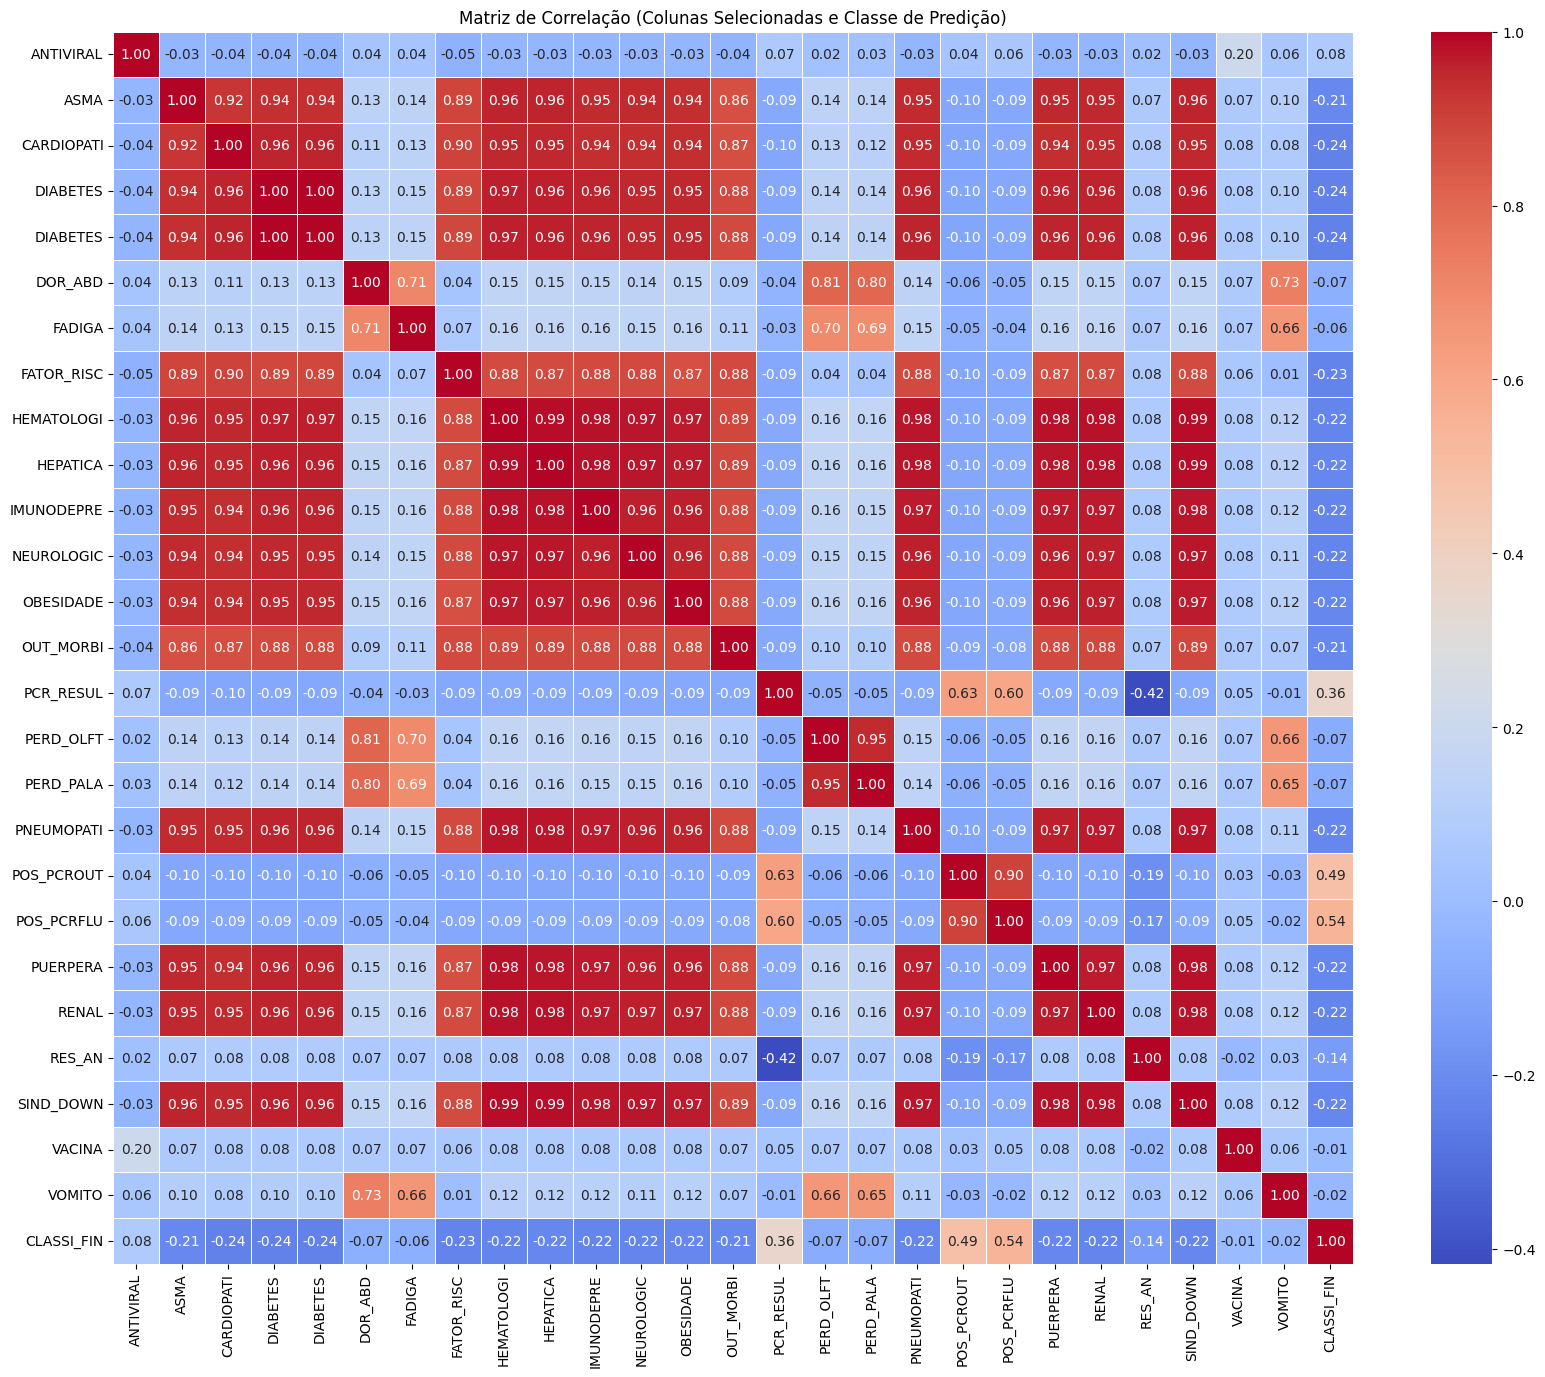

In [41]:
# Lista das colunas que você deseja visualizar, incluindo a classe de predição 'CLASSI_FIN'
colunas_desejadas = [
    'ANTIVIRAL', 'ASMA', 'CARDIOPATI', 'DIABETES', 'DIABETES', 'DOR_ABD', 'FADIGA', 
    'FATOR_RISC', 'HEMATOLOGI', 'HEPATICA', 'IMUNODEPRE', 'NEUROLOGIC', 'OBESIDADE', 
    'OUT_MORBI', 'PCR_RESUL', 'PERD_OLFT', 'PERD_PALA', 'PNEUMOPATI', 'POS_PCROUT', 
    'POS_PCRFLU', 'PUERPERA', 'RENAL', 'RES_AN', 'SIND_DOWN', 'VACINA', 'VOMITO', 'CLASSI_FIN'
]

# Filtrar a matriz de correlação para exibir apenas essas colunas
correlation_matrix_filtered = var_dfFinal_encoded[colunas_desejadas].corr()

# Definir o tamanho da figura
plt.figure(figsize=(20, 16))  # Ajuste o tamanho conforme necessário

# Visualizar a matriz de correlação filtrada usando um mapa de calor
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlação (Colunas Selecionadas e Classe de Predição)')
plt.show()

# Modeling
Iniciando a modelagem do problema e separando em treino e teste

In [42]:
var_dfFinal_encoded.head(5)

,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M
0,81,1,1,2,2.0,2,2,2,1,2,1,1,2,2,2,2,1,2,2,2,2,2,2,2,1,1,2,2,1,9,9,1,2,1,1,1,2.0,1,5,1,3,1,2,2,2,9,9,9,9,1,2,9.0,2.0,0,False,False,True
1,2,4,5,1,9.0,2,2,1,1,2,1,1,1,9,9,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,2,1,2,1,1,1,2.0,1,2,1,1,9,9,9,9,9,9,4,2,2,2,2.0,9.0,0,False,False,True
2,71,1,3,1,2.0,2,2,2,1,2,1,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,9,2,1,2,1,1,2,9.0,9,4,1,1,2,2,2,2,2,9,5,2,1,2,9.0,2.0,0,True,False,False
3,92,1,2,1,2.0,2,2,2,2,1,2,2,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,2,2,1,2,1,1,4,9.0,9,5,1,1,2,2,2,2,3,2,1,2,1,2,2.0,2.0,0,True,False,False
9,2,4,5,1,2.0,2,2,1,2,2,1,1,2,2,2,9,2,9,9,9,9,9,9,9,9,9,9,9,9,9,1,1,2,1,1,2,9.0,9,4,1,1,2,2,2,2,9,2,2,2,2,2,2.0,9.0,0,False,False,True


In [43]:
var_dfFinal_encoded.describe()

,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza
count,141372.000000,141372.0,141372.0,141372.0,141372.000000,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.000000,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.0,141372.000000,141372.000000,141372.000000
mean,30.633364,3.166426,5.927666,1.164997,4.427892,2.19228,2.949778,1.452303,1.247751,2.334267,1.346186,1.331643,1.430517,2.230774,2.183127,6.154224,1.526328,5.860022,6.129601,6.124098,6.140827,6.002341,5.975306,6.052203,6.050208,6.092982,6.115277,6.148799,5.89981,6.418577,2.890466,1.0,1.785849,1.0,1.180113,2.299204,7.035552,6.668244,3.615497,1.048199,1.345542,2.35536,2.158086,2.512485,2.522048,8.222342,5.490203,3.403015,2.30888,1.614096,1.953951,3.497545,4.672623,0.106372
std,32.815932,2.49407,3.402867,0.907252,3.370789,1.233692,2.400608,0.81853,0.67596,1.768558,0.803885,0.745643,0.832816,1.495753,1.502632,3.44168,0.499308,3.677597,3.45438,3.454068,3.448945,3.550893,3.585514,3.519871,3.523461,3.484556,3.476629,3.46916,3.698279,3.471278,2.458076,0.0,0.887595,0.0,0.736311,1.339686,3.190011,3.60992,1.123076,0.280178,1.295223,1.693035,1.609767,1.851622,1.86472,2.104267,3.519347,2.007976,1.456223,1.062753,0.209591,2.884867,3.416833,0.308314
min,0.000000,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
25%,3.000000,1.0,3.0,1.0,2.000000,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,1.0,2.0,2.000000,2.000000,0.000000
50%,9.000000,4.0,9.0,1.0,2.000000,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,1.0,2.0,1.0,1.0,2.0,9.000000,9.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,9.0,9.0,4.0,2.0,2.0,2.0,2.000000,2.000000,0.000000
75%,65.000000,4.0,9.0,1.0,9.000000,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,1.0,2.0,1.0,1.0,4.0,9.000000,9.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,9.0,9.0,5.0,2.0,2.0,2.0,2.000000,9.000000,0.000000
max,123.000000,9.0,9.0,9.0,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,9.0,1.0,9.0,9.0,9.000000,9.0,5.0,4.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,9.000000,9.000000,1.000000


### Normalizando o Dataset

In [44]:
scaler = StandardScaler()

colunas_para_normalizar = var_dfFinal_encoded.drop(columns=['CLASSI_FIN'])
coluna_nao_normalizar = var_dfFinal_encoded['CLASSI_FIN']

# Normalizando todas as colunas, exceto 'CLASSI-FIN'
df_normalizado = pd.DataFrame(scaler.fit_transform(colunas_para_normalizar), columns=colunas_para_normalizar.columns)

# Adicionando de volta a coluna 'CLASSI-FIN'
df_normalizado['CLASSI_FIN'] = coluna_nao_normalizar.reset_index(drop=True)


df_normalizado.head()

,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M,CLASSI_FIN
0,1.534828,-0.868634,-1.448097,0.920368,-0.720277,-0.155858,-0.395642,0.669125,-0.366518,-0.189006,-0.430643,-0.444776,0.683807,-0.154287,-0.121871,-1.207038,-1.054118,-1.049608,-1.195472,-1.193987,-1.200611,-1.127141,-1.108717,-1.151240,-1.433314,-1.461592,-1.183702,-1.195913,-1.324894,0.743655,2.485503,0.0,0.241272,0.0,-0.244617,-0.969785,-1.578543,-1.570191,-0.172031,1.277358,-0.800553,-0.098205,-0.276777,-0.279962,0.369564,0.997290,2.787387,4.594863,-0.577837,0.219708,1.907358,-0.782196,-0.345013,-0.962983,-0.007523,0.963092,5
1,-0.872548,0.334223,-0.272614,-0.181866,1.356396,-0.155858,-0.395642,-0.552582,-0.366518,-0.189006,-0.430643,-0.444776,-0.516943,4.525648,4.536638,0.826859,0.948661,0.853816,0.830948,0.832616,0.829002,0.844202,0.843590,0.837476,0.837189,0.834261,0.829750,0.821874,0.838282,0.743655,-0.362263,0.0,0.241272,0.0,-0.244617,-0.969785,-1.578543,-1.570191,-0.172031,-0.266783,3.924704,4.250265,3.503706,3.473967,0.369564,0.997290,0.297308,-0.212111,0.363118,0.219708,-0.519106,1.266492,-0.345013,-0.962983,-0.007523,0.963092,2
2,1.230097,-0.868634,-0.860356,-0.181866,-0.720277,-0.155858,-0.395642,0.669125,-0.366518,-0.189006,-0.430643,-0.444776,-0.516943,-0.154287,-0.121871,-1.207038,-1.054118,-1.049608,-1.195472,-1.193987,-1.200611,-1.127141,-1.387618,-1.151240,-1.149501,-1.174611,-1.183702,-1.195913,-1.324894,0.743655,-0.362263,0.0,0.241272,0.0,-0.244617,-0.223339,0.615815,0.645932,-0.172031,-0.266783,-0.209896,-0.098205,-0.276777,-0.279962,-2.957023,0.997290,0.795324,-0.212111,-0.577837,0.219708,1.907358,-0.782196,-0.345013,1.038440,-0.007523,-1.038323,4
3,1.870032,-0.868634,-1.154227,-0.181866,-0.720277,-0.155858,-0.395642,0.669125,1.112865,-0.754440,0.813321,0.896353,0.683807,-0.154287,-0.121871,0.826859,0.948661,0.853816,0.830948,0.832616,0.829002,0.844202,0.843590,0.837476,0.837189,0.834261,0.829750,0.821874,0.838282,-1.272901,-0.362263,0.0,0.241272,0.0,-0.244617,1.269553,0.615815,0.645932,-0.172031,-0.266783,-0.209896,-0.098205,-0.276777,-0.279962,-2.481796,-0.991722,-1.196739,-0.212111,-0.577837,0.219708,-0.519106,-0.782196,-0.345013,1.038440,-0.007523,-1.038323,5
4,-0.872548,0.334223,-0.272614,-0.181866,-0.720277,-0.155858,-0.395642,-0.552582,1.112865,-0.189006,-0.430643,-0.444776,0.683807,-0.154287,-0.121871,0.826859,0.948661,0.853816,0.830948,0.832616,0.829002,0.844202,0.843590,0.837476,0.837189,0.834261,0.829750,0.821874,0.838282,0.743655,-0.769087,0.0,0.241272,0.0,-0.244617,-0.223339,0.615815,0.645932,-0.172031,-0.266783,-0.209896,-0.098205,-0.276777,-0.279962,0.369564,-0.991722,-0.698723,-0.212111,0.363118,0.219708,-0.519106,1.266492,-0.345013,-0.962983,-0.007523,0.963092,4


In [45]:
df_normalizado.describe()

,NU_IDADE_N,CS_RACA,CS_ESCOL_N,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,ANTIVIRAL,HOSPITAL,UTI,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,POS_PCROUT,CRITERIO,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,Coriza,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M,CLASSI_FIN
count,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,141372.0,1.413720e+05,141372.0,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,1.413720e+05,141372.0
mean,-3.073430e-17,-8.101993e-17,1.819430e-17,-5.101441e-17,4.412872e-17,1.553049e-16,3.576035e-17,-4.252038e-17,-2.668833e-17,-7.232486e-17,7.327981e-17,4.925529e-18,6.543917e-17,1.427398e-16,5.729697e-18,1.879743e-17,-1.385179e-16,-6.182041e-17,1.414330e-16,6.272510e-17,-2.151149e-17,-9.016734e-17,-1.065523e-17,-1.688753e-17,-7.237512e-17,-1.248471e-16,4.221882e-18,1.453534e-16,-5.729697e-17,-9.680172e-17,-6.272510e-17,0.0,1.703831e-17,0.0,-5.458290e-17,-1.900349e-16,-1.365075e-16,-3.709225e-17,3.881367e-17,9.298192e-17,8.292982e-17,-3.005578e-17,5.588968e-17,-1.038382e-16,1.574159e-16,1.630953e-17,1.718909e-17,4.216856e-17,4.666687e-17,-3.358155e-16,8.986577e-17,-6.714803e-17,1.331903e-17,-3.467974e-17,-2.010420e-19,-5.026050e-19,3.615497
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0,1.000004e+00,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.123076
min,-9.334939e-01,-8.686338e-01,-1.741968e+00,-1.818656e-01,-1.016944e+00,-9.664355e-01,-8.122047e-01,-5.525817e-01,-3.665179e-01,-7.544405e-01,-4.306427e-01,-4.447758e-01,-5.169427e-01,-8.228489e-01,-7.873724e-01,-1.497595e+00,-1.054118e+00,-1.321526e+00,-1.484961e+00,-1.483502e+00,-1.490556e+00,-1.408761e+00,-1.387618e+00,-1.435343e+00,-1.433314e+00,-1.461592e+00,-1.471338e+00,-1.484168e+00,-1.324894e+00,-1.560980e+00,-7.690865e-01,0.0,-8.853718e-01,0.0,-2.446170e-01,-9.697852e-01,-1.892023e+00,-1.570191e+00,-1.720309e-01,-2.667831e-01,-8.005534e-01,-7.194148e-01,-8.168461e-01,-8.162373e-01,-3.432249e+00,-1.275867e+00,-1.196739e+00,-8.988219e-01,-5.778373e-01,-4.551497e+00,-8.657433e-01,-1.074866e+00,-3.450126e-01,-9.629827e-01,-7.522732e-03,-1.038323e+00,1.0
25%,-8.420746e-01,-8.686338e-01,-8.603557e-01,-1.818656e-01,-7.202768e-01,-1.558578e-01,-3.956420e-01,-5.525817e-01,-3.665179e-01,-1.890061e-01,-4.306427e-01,-4.447758e-01,-5.169427e-01,-1.542868e-01,-1.218711e-01,-1.207038e+00,-1.054118e+00,-1.049608e+00,-1.195472e+00,-1.193987e+00,-1.200611e+00,-1.127141e+00,-1.108717e+00,-1.151240e+00,-1.149501e+00,-1.174611e+00,-1.183702e+00,-1.195913e+00,-1.054497e+00,-1.272901e+00,-3.622628e-01,0.0,-8.853718e-01,0.0,-2.446170e-01,-9.697852e-01,-1.57

### Todas as colunas

In [46]:
var_colunasX = [var_coluna for var_coluna in df_normalizado.columns if var_coluna != 'CLASSI_FIN']

var_x = df_normalizado[var_colunasX]  # Features (X).
var_y = df_normalizado[['CLASSI_FIN']]  # Alvo (y).


Porcentagem de dados por cada tipo de classificação

In [47]:
df_normalizado['CLASSI_FIN'].value_counts()/len(df_normalizado)*100

CLASSI_FIN
4    57.001386
2    20.247291
5    17.044394
1     4.646606
3     1.060323
Name: count, dtype: Float64

In [48]:
# Divisão dos dados em conjuntos de treinamento e teste, mantendo a proporção das classes da variável alvo (stratify).
var_xTrain, var_xTest, var_yTrain, var_yTest = train_test_split(var_x, var_y, test_size=0.25, stratify=var_y, random_state=42)


In [49]:
print(var_xTrain.shape)
print(var_xTest.shape)
print(var_yTrain.shape)
print(var_yTest.shape)

(106029, 56)
(35343, 56)
(106029, 1)
(35343, 1)


### Funções para plot de métricas

In [50]:
def plot_metricas(modelo, x_treino, x_teste ,y_treino, y_teste, nome_modelo='' ):
    var_yPredModeloTrain = modelo.predict(x_treino)  # Predição para o conjunto de treino
    var_yPredModeloTest = modelo.predict(x_teste)  # Predição para o conjunto de teste.

    # Calcular Métricas com 2 casas decimais
    metricas = {
        'Métrica': ['Acurácia', 'F-Medida', 'Precisão', 'Revocação', 'ROC AUC'],
        'Treino': [
            round(accuracy_score(y_treino, var_yPredModeloTrain) * 100, 2),
            round(f1_score(y_treino, var_yPredModeloTrain, average="weighted") * 100, 2),
            round(precision_score(y_treino, var_yPredModeloTrain, average="weighted") * 100, 2),
            round(recall_score(y_treino, var_yPredModeloTrain, average="weighted") * 100, 2),
            round(roc_auc_score(y_treino, modelo.predict_proba(x_treino), multi_class="ovr") * 100, 2)
        ],
        'Teste': [
            round(accuracy_score(y_teste, var_yPredModeloTest) * 100, 2),
            round(f1_score(y_teste, var_yPredModeloTest, average="weighted") * 100, 2),
            round(precision_score(y_teste, var_yPredModeloTest, average="weighted") * 100, 2),
            round(recall_score(y_teste, var_yPredModeloTest, average="weighted") * 100, 2),
            round(roc_auc_score(y_teste, modelo.predict_proba(x_teste), multi_class="ovr") * 100, 2)
        ]
    }

    # Criar DataFrame
    df_metricas = pd.DataFrame(metricas)

    # Adicionar porcentagem e melhorar o estilo da tabela
    df_metricas_styled = df_metricas.style.format({
        'Treino': '{:.2f}%',
        'Teste': '{:.2f}%'
    }).set_properties(**{
        'background-color': 'lightyellow',
        'color': 'black',
        'border-color': 'black',
        'border-style': 'solid',
        'text-align': 'center'
    }).set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', 'lightblue'),
                  ('color', 'black'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])

    # Exibir o DataFrame estilizado
    print(f'\nMétricas do Modelo --- {nome_modelo} --- \n')
    display(df_metricas_styled)


def plot_matriz_confusao(modelo, x_treino, x_teste ,y_treino, y_teste, nome_modelo='' ):

  # Nomes das classes
  class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

  # Previsões para treino e teste
  var_yPredModeloTrain = modelo.predict(x_treino)
  var_yPredModeloTest = modelo.predict(x_teste)

  # Criar subplots para os dois gráficos lado a lado
  plt.figure(figsize=(16, 6))

  # Matriz de Confusão para o conjunto de treino
  plt.subplot(1, 2, 1)  # Subplot 1 (lado esquerdo)
  conf_matrix_Modelo_train = confusion_matrix(y_treino, var_yPredModeloTrain)
  sns.heatmap(conf_matrix_Modelo_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Previsto')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Verdadeiro')
  plt.title(f'Matriz de Confusão - {nome_modelo} - Treino')

  # Matriz de Confusão para o conjunto de teste
  plt.subplot(1, 2, 2)  # Subplot 2 (lado direito)
  conf_matrix_Modelo_test = confusion_matrix(y_teste, var_yPredModeloTest)
  sns.heatmap(conf_matrix_Modelo_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Previsto')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Verdadeiro')
  plt.title(f'Matriz de Confusão - {nome_modelo} - Teste')

  # Ajustar layout e exibir os gráficos
  # plt.tight_layout()
  plt.subplots_adjust(wspace=0.5)
  plt.show()



def plot_curva_roc(modelo, x_treino, x_teste ,y_treino, y_teste, nome_modelo='' ):
  # Binarizando os rótulos
  var_yTrain_binarized = label_binarize(y_treino, classes=modelo.classes_)
  var_yTest_binarized = label_binarize(y_teste, classes=modelo.classes_)
  n_classes = var_yTest_binarized.shape[1]

  # Plotando a Curva ROC para o conjunto de teste e treino
  fpr_train = dict()
  tpr_train = dict()
  roc_auc_train = dict()

  fpr_test = dict()
  tpr_test = dict()
  roc_auc_test = dict()


  for i in range(n_classes):
      fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], modelo.predict_proba(x_treino)[:, i])
      roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

      fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], modelo.predict_proba(x_teste)[:, i])
      roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

  # Nomes das classes
  class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

  # Plotando todas as curvas ROC
  plt.figure(figsize=(14, 7))

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])

  # Curva ROC para o conjunto de treino
  plt.subplot(1, 2, 2)
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0, 1])
  plt.ylim([0, 1.05])
  plt.xlabel('Falso Positivo')
  plt.ylabel('Verdadeiro Positivo')
  plt.title(f'Curva ROC - {nome_modelo} Treino')
  plt.legend(loc="lower right")

  # Curva ROC para o conjunto de teste
  plt.subplot(1, 2, 1)
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Falso Positivo')
  plt.ylabel('Verdadeiro Positivo')
  plt.title(f'Curva ROC - {nome_modelo} Teste')
  plt.legend(loc="lower right")

  plt.show()

Função para o plot final

In [51]:
def plot_metricas_modelos_organizado(x_treino, x_teste, y_treino, y_teste,
                                     log_reg, knn, naive_bayes, svm,
                                     gradient_boosting, arvore_decisao, random_forest):

    # Dicionário para armazenar as métricas
    metricas = {
        'Métricas': ['F-Medida Treino', 'F-Medida Teste', 'ROC AUC Treino', 'ROC AUC Teste'],
        'Regressão Logística': [],
        'KNN': [],
        'Naive Bayes': [],
        'SVM': [],
        'Gradient Boosting': [],
        'Árvores de Decisão': [],
        'Random Forest': []
    }

    # Lista de modelos e seus respectivos nomes
    modelos = {
        'Regressão Logística': log_reg,
        'KNN': knn,
        'Naive Bayes': naive_bayes,
        'SVM': svm,
        'Gradient Boosting': gradient_boosting,
        'Árvores de Decisão': arvore_decisao,
        'Random Forest': random_forest
    }

    # Preenchimento do dicionário com as métricas
    for nome_modelo, modelo in modelos.items():
        # Predições para treino e teste
        y_pred_train = modelo.predict(x_treino)
        y_pred_test = modelo.predict(x_teste)

        # Calcula o F1-score para treino e teste
        f1_train = f1_score(y_treino, y_pred_train, average="weighted")
        f1_test = f1_score(y_teste, y_pred_test, average="weighted")

        # Calcula o ROC AUC para treino e teste (se o modelo tiver `predict_proba`)
        try:
            roc_train = roc_auc_score(y_treino, modelo.predict_proba(x_treino), multi_class="ovr")
            roc_test = roc_auc_score(y_teste, modelo.predict_proba(x_teste), multi_class="ovr")
        except AttributeError:
            roc_train = 'N/A'
            roc_test = 'N/A'

        # Adiciona as métricas ao dicionário
        metricas[nome_modelo].extend([
            round(f1_train * 100, 2),  # F1-score treino
            round(f1_test * 100, 2),   # F1-score teste
            round(roc_train * 100, 2) if roc_train != 'N/A' else 'N/A',  # ROC AUC treino
            round(roc_test * 100, 2) if roc_test != 'N/A' else 'N/A'    # ROC AUC teste
        ])

    # Cria o DataFrame com as métricas
    df_metricas = pd.DataFrame(metricas)

    # Exibe o DataFrame com formatação
    display(df_metricas.style.format({
        'Regressão Logística': '{:.2f}%' if isinstance(df_metricas['Regressão Logística'][0], (int, float)) else '{}',
        'KNN': '{:.2f}%' if isinstance(df_metricas['KNN'][0], (int, float)) else '{}',
        'Naive Bayes': '{:.2f}%' if isinstance(df_metricas['Naive Bayes'][0], (int, float)) else '{}',
        'SVM': '{:.2f}%' if isinstance(df_metricas['SVM'][0], (int, float)) else '{}',
        'Gradient Boosting': '{:.2f}%' if isinstance(df_metricas['Gradient Boosting'][0], (int, float)) else '{}',
        'Árvores de Decisão': '{:.2f}%' if isinstance(df_metricas['Árvores de Decisão'][0], (int, float)) else '{}',
        'Random Forest': '{:.2f}%' if isinstance(df_metricas['Random Forest'][0], (int, float)) else '{}'
    }).set_properties(**{
        'background-color': 'lightyellow',
        'color': 'black',
        'border-color': 'black',
        'border-style': 'solid',
        'text-align': 'center'
    }).set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', 'lightblue'),
                  ('color', 'black'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }]))

Função para plotar os resultados do melhores parametros dos algoritmos

In [52]:
# Função para criar um DataFrame com os melhores parâmetros e resultados
def create_results_dataframe(grid_search):
    # Extrair os melhores parâmetros
    best_params = grid_search.best_params_
    
    # Extrair os resultados das validações cruzadas
    results = grid_search.cv_results_
    
    # Criar um DataFrame com os melhores parâmetros
    df_results = pd.DataFrame({
        'param': [best_params],
        'mean_test_score': [grid_search.best_score_],
        'std_test_score': [results['std_test_score'][grid_search.best_index_]],
        'params': [results['params'][grid_search.best_index_]]
    })
    
    return df_results


## LogisticRegression

In [53]:
# Criação de um modelo de Regressão Logística.
var_lr = LogisticRegression()

# Treinamento do modelo de Regressão Logística com os dados de treinamento.
var_lr.fit(var_xTrain, var_yTrain)

plot_metricas(var_lr, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Regressão Logística')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Métricas do Modelo --- Regressão Logística --- 



,Métrica,Treino,Teste
0,Acurácia,90.85%,90.69%
1,F-Medida,90.21%,90.04%
2,Precisão,89.84%,89.63%
3,Revocação,90.85%,90.69%
4,ROC AUC,92.04%,92.66%


### GridSearch

In [54]:
# Regressão logistica
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Controle de regularização
    'solver': ['liblinear', 'lbfgs'],  # Otimizadores
    'penalty': ['l2', 'l1']  # Tipo de regularização
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='f1_macro', cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(var_xTrain, var_yTrain)

best_model_lr = grid_search_lr.best_estimator_
result_models_lr = grid_search_lr.cv_results_

plot_metricas(best_model_lr, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Regressão Logística GridSearch')

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^


Métricas do Modelo --- Regressão Logística GridSearch --- 



,Métrica,Treino,Teste
0,Acurácia,90.11%,90.83%
1,F-Medida,89.49%,90.20%
2,Precisão,89.12%,89.80%
3,Revocação,90.11%,90.83%
4,ROC AUC,93.60%,93.12%


Melhoers parametros Regressão logistica

In [90]:
display(create_results_dataframe(grid_search_lr))

,param,mean_test_score,std_test_score,params
0,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.687214,0.002085,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"


In [57]:
# Converter para DataFrame
results_df_lr = pd.DataFrame(result_models_lr)

print(results_df_lr)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       14.941758      1.954473         0.044475        0.007605     0.01   
1        1.855876      0.335960         0.028401        0.002260     0.01   
2       18.281300      2.392866         0.051410        0.014786     0.01   
3        0.054008      0.007417         0.000000        0.000000     0.01   
4       19.161726      2.634193         0.037762        0.005294     0.10   
5        4.626404      0.652039         0.046635        0.016105     0.10   
6       42.860441      6.236079         0.048112        0.008041     0.10   
7        0.099584      0.019778         0.000000        0.000000     0.10   
8       26.764544      1.721590         0.050789        0.009532     1.00   
9        5.105538      0.759122         0.038813        0.003530     1.00   
10      75.506598     10.992977         0.027290        0.007495     1.00   
11       0.094924      0.009041         0.000000        0.000000     1.00   

### Matriz de confusão e Curva Roc

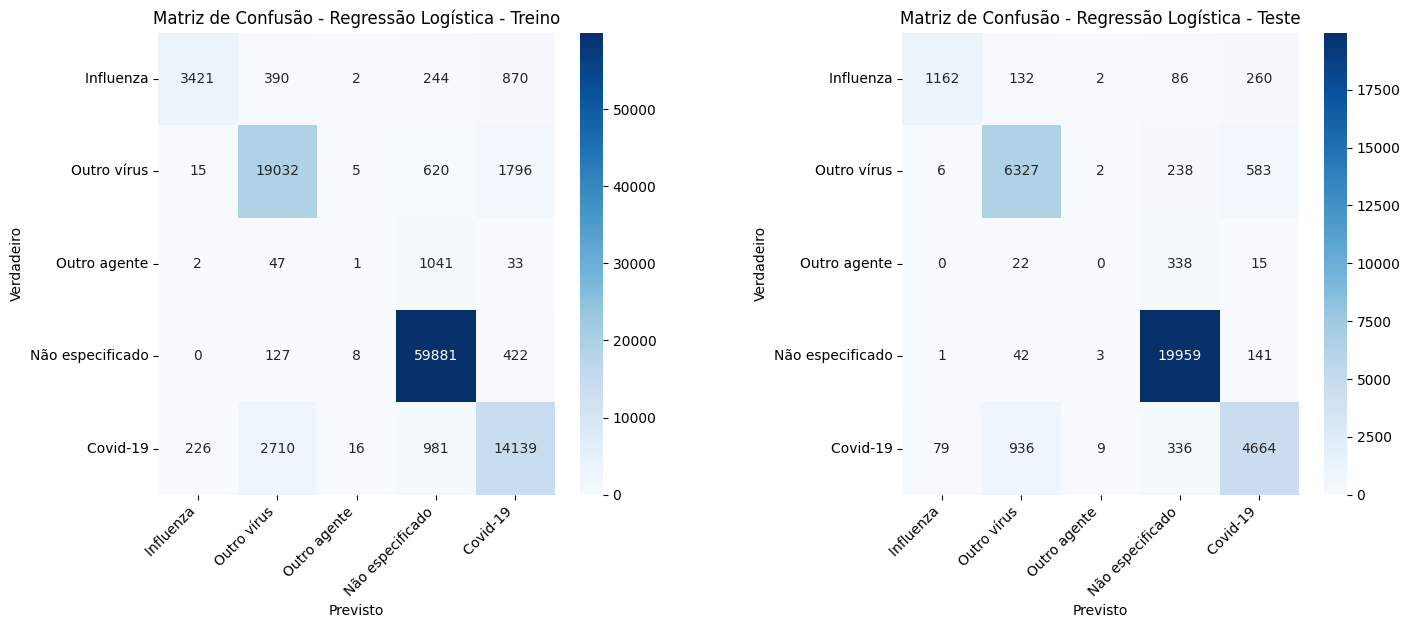

In [162]:
plot_matriz_confusao(best_model_lr, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Regressão Logística')

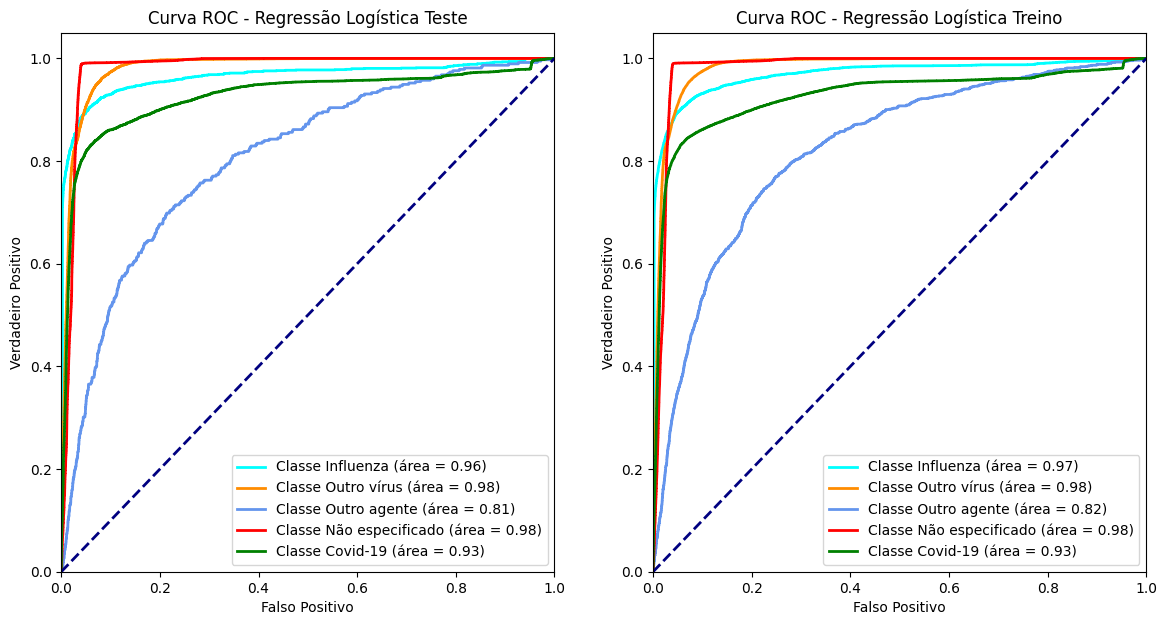

In [163]:
plot_curva_roc(best_model_lr, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Regressão Logística')

## KNN

In [74]:
# Criação de um modelo K-Vizinhos Mais Próximos com 5 vizinhos.
var_knn = KNeighborsClassifier()

# Treinamento do modelo K-Vizinhos Mais Próximos com os dados de treinamento.
var_knn.fit(var_xTrain, var_yTrain)

plot_metricas(var_knn, var_xTrain, var_xTest, var_yTrain, var_yTest, 'KNN')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Métricas do Modelo --- KNN --- 



,Métrica,Treino,Teste
0,Acurácia,85.84%,80.79%
1,F-Medida,84.54%,78.72%
2,Precisão,85.03%,78.49%
3,Revocação,85.84%,80.79%
4,ROC AUC,97.55%,81.42%


### GridSearch

In [75]:
# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # Tipo de ponderação
    'p': [1, 2]  # Distância (1 = Manhattan, 2 = Euclidiana)
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='f1_macro', cv=3, n_jobs=-1, verbose=2)
grid_search_knn.fit(var_xTrain, var_yTrain)

best_model_knn = grid_search_knn.best_estimator_
result_models_knn = grid_search_knn.cv_results_

plot_metricas(best_model_knn, var_xTrain, var_xTest, var_yTrain, var_yTest, 'KNN GridSearch')


Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Métricas do Modelo --- KNN GridSearch --- 



,Métrica,Treino,Teste
0,Acurácia,99.95%,83.45%
1,F-Medida,99.95%,82.06%
2,Precisão,99.95%,81.85%
3,Revocação,99.95%,83.45%
4,ROC AUC,100.00%,81.72%


In [91]:
display(create_results_dataframe(grid_search_knn))

,param,mean_test_score,std_test_score,params
0,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.573302,0.004707,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}"


### Matriz de confusão e curva ROC

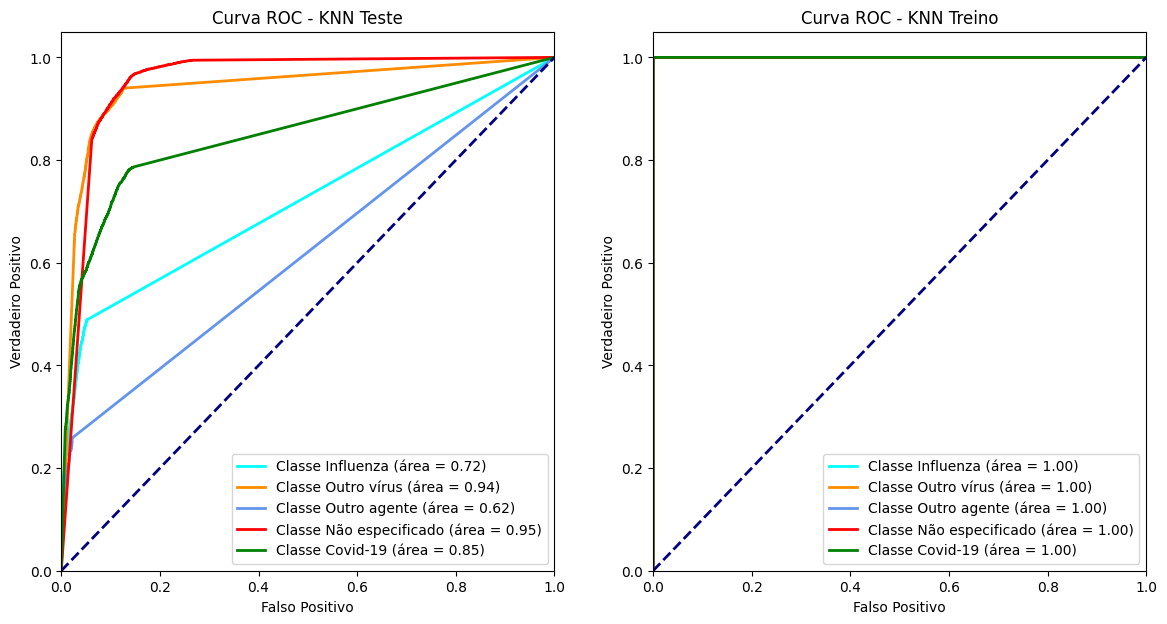

In [78]:
plot_curva_roc(best_model_knn, var_xTrain, var_xTest, var_yTrain, var_yTest, 'KNN')


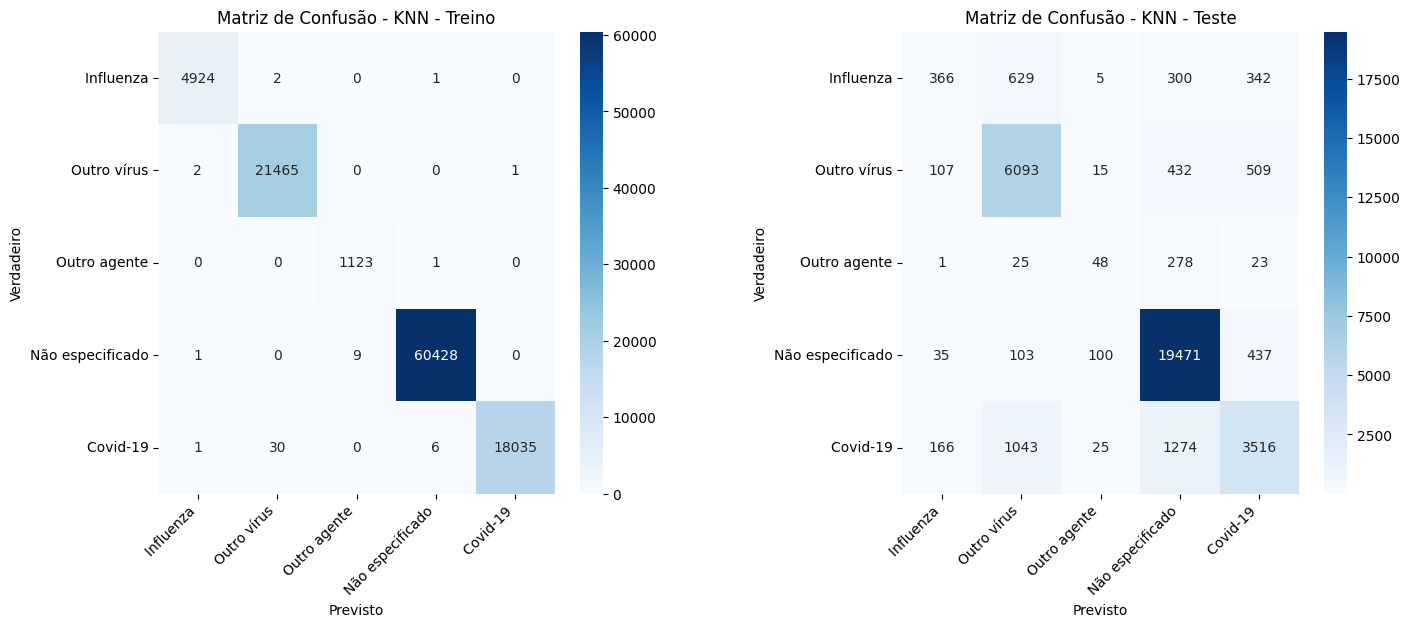

In [79]:
plot_matriz_confusao(best_model_knn, var_xTrain, var_xTest, var_yTrain, var_yTest, 'KNN')

##  Naive Bayes

In [80]:
# Criação do classificador Naive Bayes Gaussiano.
var_nb = GaussianNB()

# Treinamento do modelo Naive Bayes Gaussiano com os dados de treinamento.
var_nb.fit(var_xTrain, var_yTrain)

plot_metricas(var_nb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Naive Bayes')


c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Métricas do Modelo --- Naive Bayes --- 



,Métrica,Treino,Teste
0,Acurácia,75.78%,75.61%
1,F-Medida,72.94%,72.78%
2,Precisão,71.64%,71.34%
3,Revocação,75.78%,75.61%
4,ROC AUC,81.27%,80.83%


### GridSearch

In [81]:
# Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# GridSearchCV para Naive Bayes
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search_nb.fit(var_xTrain, var_yTrain)

# Melhor modelo
results_nb = grid_search_nb.cv_results_
best_nb = grid_search_nb.best_estimator_

plot_metricas(best_nb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Naive Bayes GridSearch')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Métricas do Modelo --- Naive Bayes GridSearch --- 



,Métrica,Treino,Teste
0,Acurácia,75.78%,75.61%
1,F-Medida,72.94%,72.78%
2,Precisão,71.64%,71.34%
3,Revocação,75.78%,75.61%
4,ROC AUC,81.27%,80.83%


In [92]:
display(create_results_dataframe(grid_search_nb))

,param,mean_test_score,std_test_score,params
0,{'var_smoothing': 1e-09},NaN,NaN,{'var_smoothing': 1e-09}


### Matriz de cinfusão e curva ROC

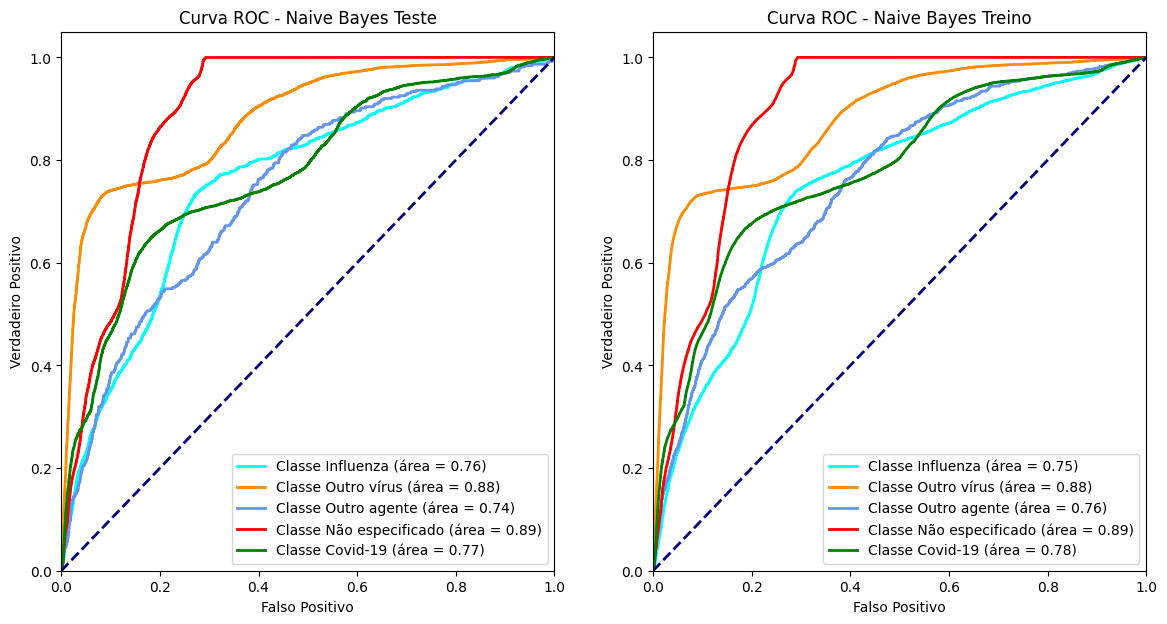

In [83]:
plot_curva_roc(best_nb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Naive Bayes')

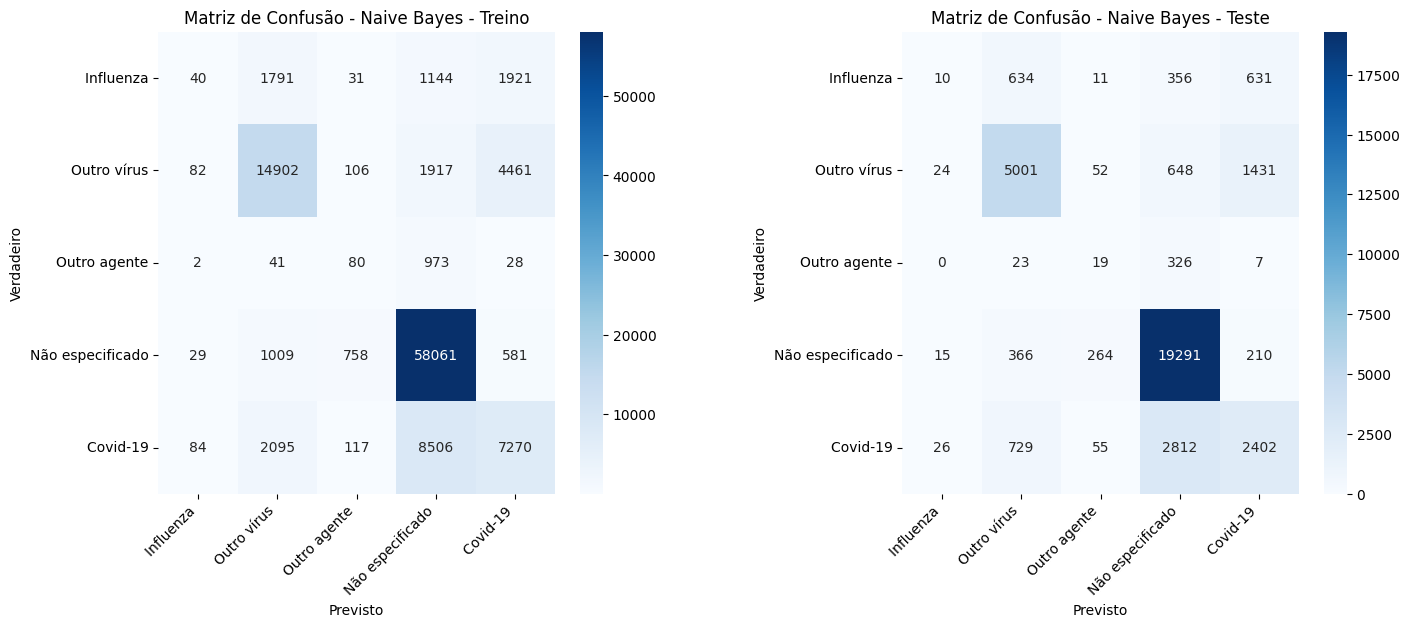

In [84]:
plot_matriz_confusao(best_nb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Naive Bayes')

# Metas TCC2

Aplicar novos modelos: SVM, Gradient Boosting, Árvores de Decisão e Florestas Aleatórias;​

Utilizar o Grid Search;​

Melhorar o pré-processamento dos dados da SRAG;

## SVM

In [108]:
# Criação do classificador SVM.
var_svc = SVC(random_state=2024, max_iter=7000, probability= True)

# Treinamento do modelo SVM com os dados de treinamento.
var_svc.fit(var_xTrain, var_yTrain)

plot_metricas(var_svc, var_xTrain, var_xTest, var_yTrain, var_yTest, 'SVM')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Métricas do Modelo --- SVM --- 



,Métrica,Treino,Teste
0,Acurácia,92.72%,91.61%
1,F-Medida,92.17%,90.95%
2,Precisão,92.71%,91.40%
3,Revocação,92.72%,91.61%
4,ROC AUC,96.21%,93.16%


### GridSearch

In [109]:
param_grid_svm = {       
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Tipos de kernel
    'gamma': ['scale', 'auto'],
    'random_state': [2024],                   
    'max_iter': [7000],
    'probability': [True]
}

grid_search_svm = GridSearchCV(var_svc, param_grid_svm, scoring='f1_macro', cv=3, n_jobs=-1, verbose=2)
grid_search_svm.fit(var_xTrain, var_yTrain)            
                                                     
best_model_svm = grid_search_svm.best_estimator_
result_models_svm = grid_search_svm.cv_results_

plot_metricas(best_model_svm, var_xTrain, var_xTest, var_yTrain, var_yTest, 'SVM GridSearch')

Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Métricas do Modelo --- SVM GridSearch --- 



,Métrica,Treino,Teste
0,Acurácia,95.16%,92.37%
1,F-Medida,94.88%,91.86%
2,Precisão,95.19%,92.07%
3,Revocação,95.16%,92.37%
4,ROC AUC,98.13%,93.97%


In [110]:
display(create_results_dataframe(grid_search_svm))

,param,mean_test_score,std_test_score,params
0,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 7000, 'probability': True, 'random_state': 2024}",0.724812,0.004714,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 7000, 'probability': True, 'random_state': 2024}"


### Curva ROC e Matriz de confusão

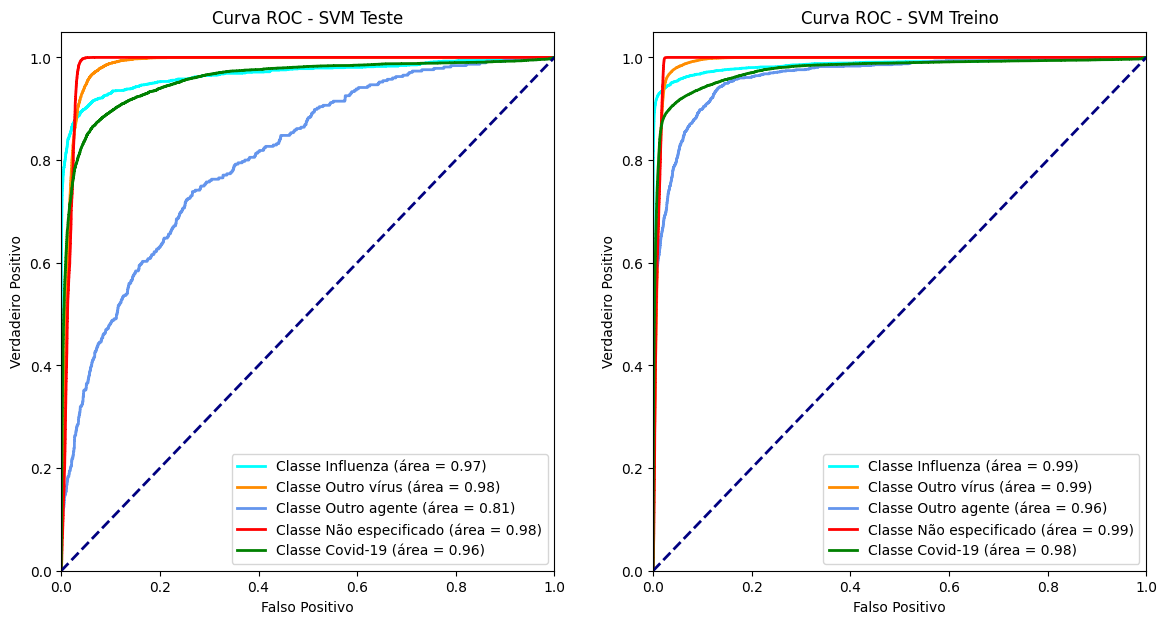

In [111]:
plot_curva_roc(best_model_svm, var_xTrain, var_xTest, var_yTrain, var_yTest, 'SVM')

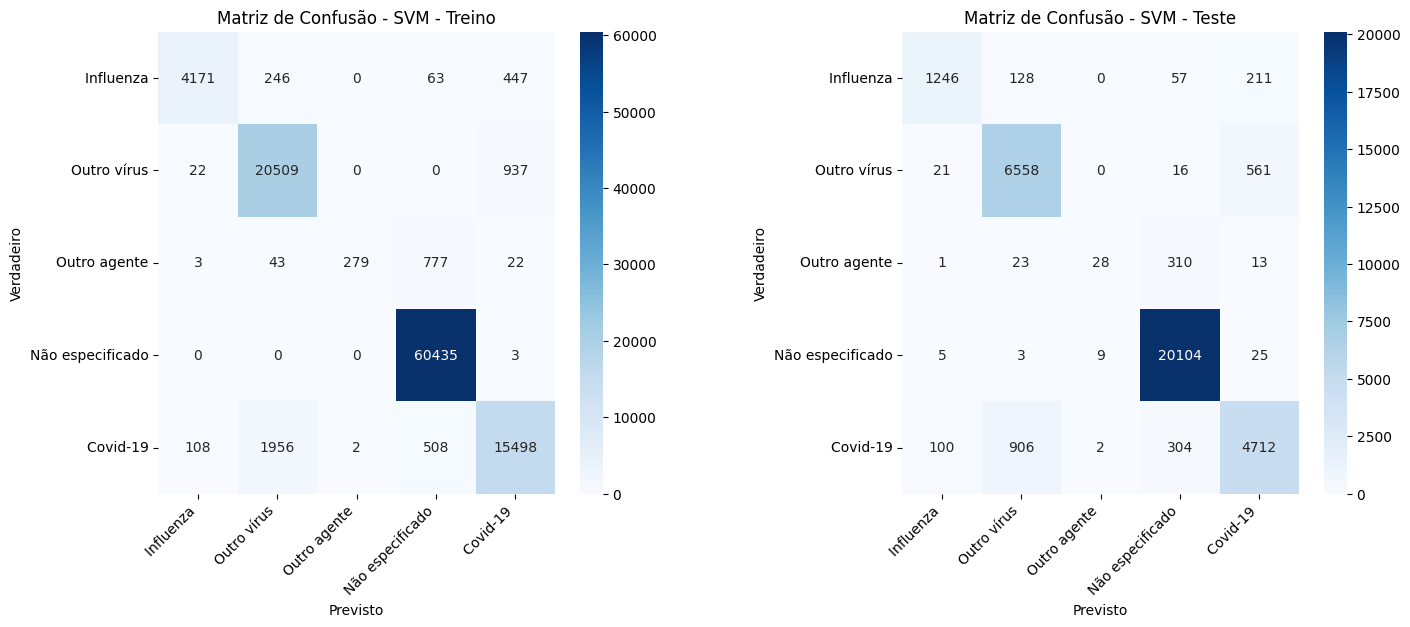

In [112]:
plot_matriz_confusao(best_model_svm, var_xTrain, var_xTest, var_yTrain, var_yTest, 'SVM')

## Gradient Boosting

In [101]:
# Criação do classificador Gradient Boosting.
var_gb = GradientBoostingClassifier(random_state=2024)

# Treinamento do modelo Gr
# adient Boosting com os dados de treinamento.
var_gb.fit(var_xTrain, var_yTrain)

plot_metricas(var_gb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Gradient Boosting')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Métricas do Modelo --- Gradient Boosting --- 



,Métrica,Treino,Teste
0,Acurácia,93.83%,93.66%
1,F-Medida,93.37%,93.15%
2,Precisão,93.70%,93.22%
3,Revocação,93.83%,93.66%
4,ROC AUC,96.63%,95.83%


### Grid Search

In [106]:
# Hiperparâmetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_features': [None,'sqrt', 'log2'],
    'max_depth' : [3, 5],
    'random_state': [2024]
}

grid_search_gb = GridSearchCV(var_gb,param_grid_gb, scoring= 'f1_macro', cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(var_xTrain, var_yTrain)

best_model_gb = grid_search_gb.best_estimator_
result_models_gb = grid_search_gb.cv_results_

plot_metricas(best_model_gb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Gradient Boosting GridSearch')

# Não é sobre o resultado, mas sim a menor diferença entre treino e teste


Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Métricas do Modelo --- Gradient Boosting GridSearch --- 



,Métrica,Treino,Teste
0,Acurácia,95.83%,93.94%
1,F-Medida,95.67%,93.54%
2,Precisão,95.88%,93.50%
3,Revocação,95.83%,93.94%
4,ROC AUC,99.07%,95.93%


In [107]:
display(create_results_dataframe(grid_search_gb))

,param,mean_test_score,std_test_score,params
0,"{'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 300, 'random_state': 2024}",0.762392,0.005328,"{'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'n_estimators': 300, 'random_state': 2024}"


### Matriz de confusão e Curva Roc

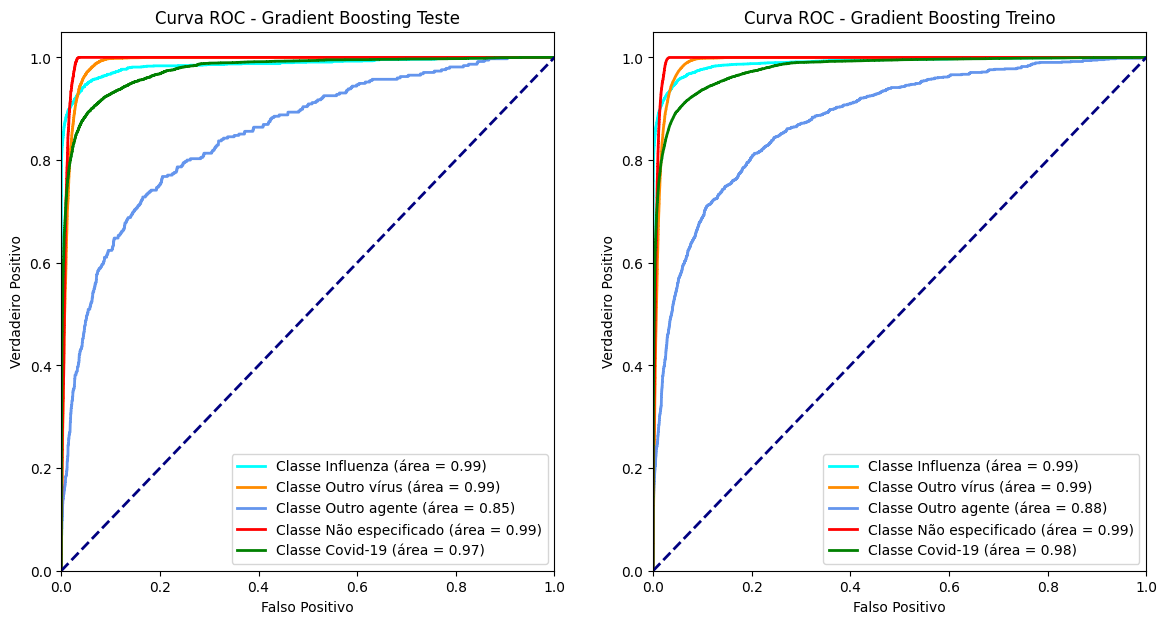

In [64]:
plot_curva_roc(var_gb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Gradient Boosting')

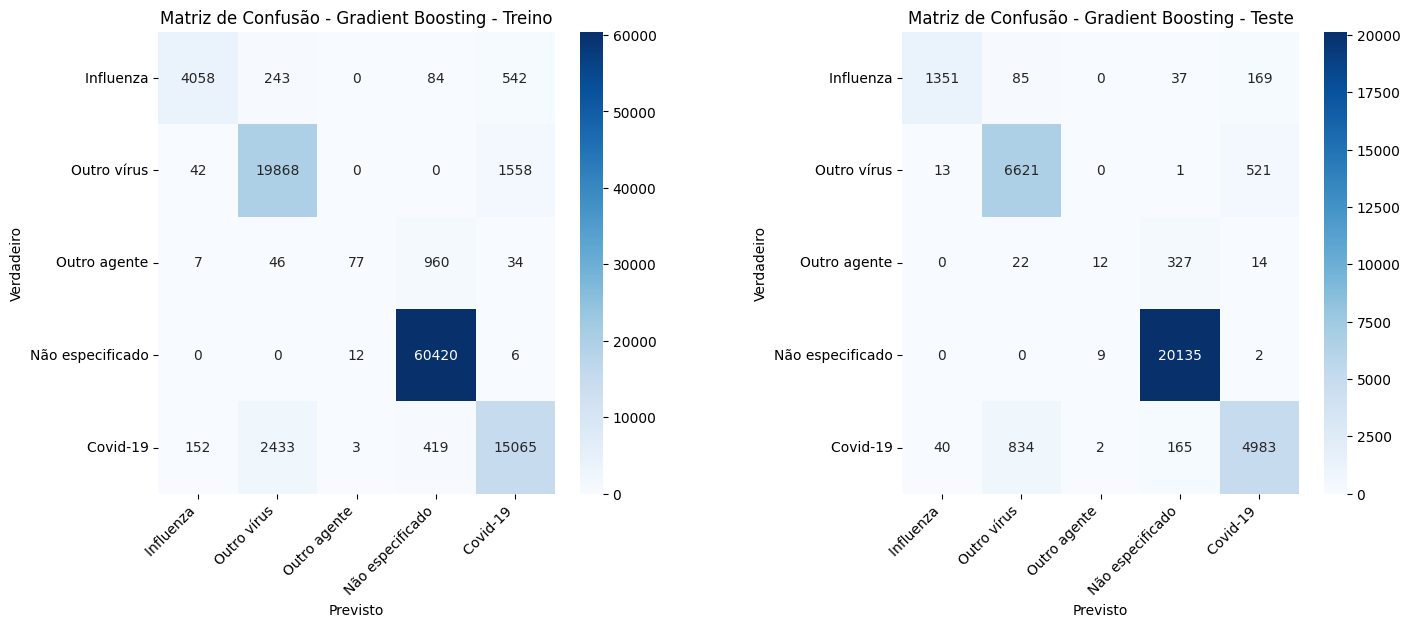

In [65]:
plot_matriz_confusao(var_gb, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Gradient Boosting')

## Árvores de Decisão

In [98]:
# Criação do classificador Árvore de decisão.
var_tree = DecisionTreeClassifier(random_state=2024)

# Treinamento do modelo Árvore de decisão com os dados de treinamento.
var_tree.fit(var_xTrain, var_yTrain)

plot_metricas(var_tree, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Decision Tree')


Métricas do Modelo --- Decision Tree --- 



,Métrica,Treino,Teste
0,Acurácia,99.95%,89.88%
1,F-Medida,99.95%,90.01%
2,Precisão,99.95%,90.14%
3,Revocação,99.95%,89.88%
4,ROC AUC,100.00%,84.73%


### Grid Search

In [99]:
# Hiperparâmetros para Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 4, 10],
}

grid_search_tree = GridSearchCV(var_tree, param_grid_dt, scoring= 'roc_auc', cv=5, n_jobs=-1)
grid_search_tree.fit(var_xTrain, var_yTrain)

best_model_tree = grid_search_tree.best_estimator_
result_models_tree = grid_search_tree.cv_results_


plot_metricas(best_model_tree, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Decision Tree Best Model')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Métricas do Modelo --- Decision Tree Best Model --- 



c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Métrica,Treino,Teste
0,Acurácia,92.69%,92.59%
1,F-Medida,92.09%,91.99%
2,Precisão,91.79%,91.69%
3,Revocação,92.69%,92.59%
4,ROC AUC,92.34%,92.04%


In [100]:
display(create_results_dataframe(grid_search_tree))

,param,mean_test_score,std_test_score,params
0,"{'max_depth': 3, 'min_samples_split': 2}",NaN,NaN,"{'max_depth': 3, 'min_samples_split': 2}"


### matriz de confusão e Curva ROC

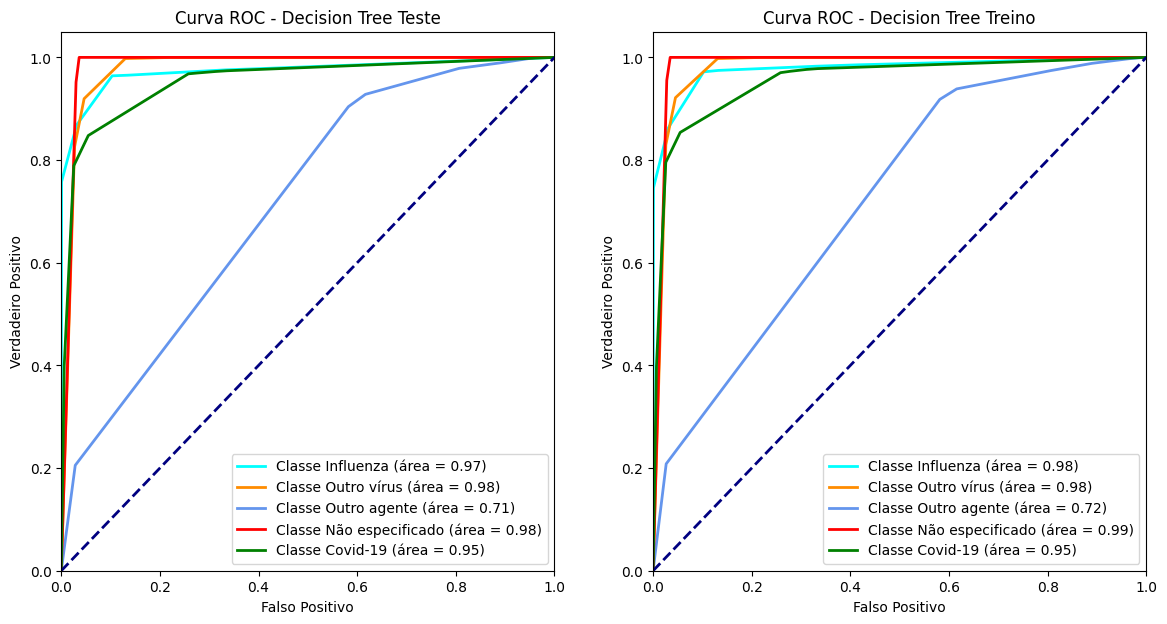

In [68]:
plot_curva_roc(best_model_tree, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Decision Tree')

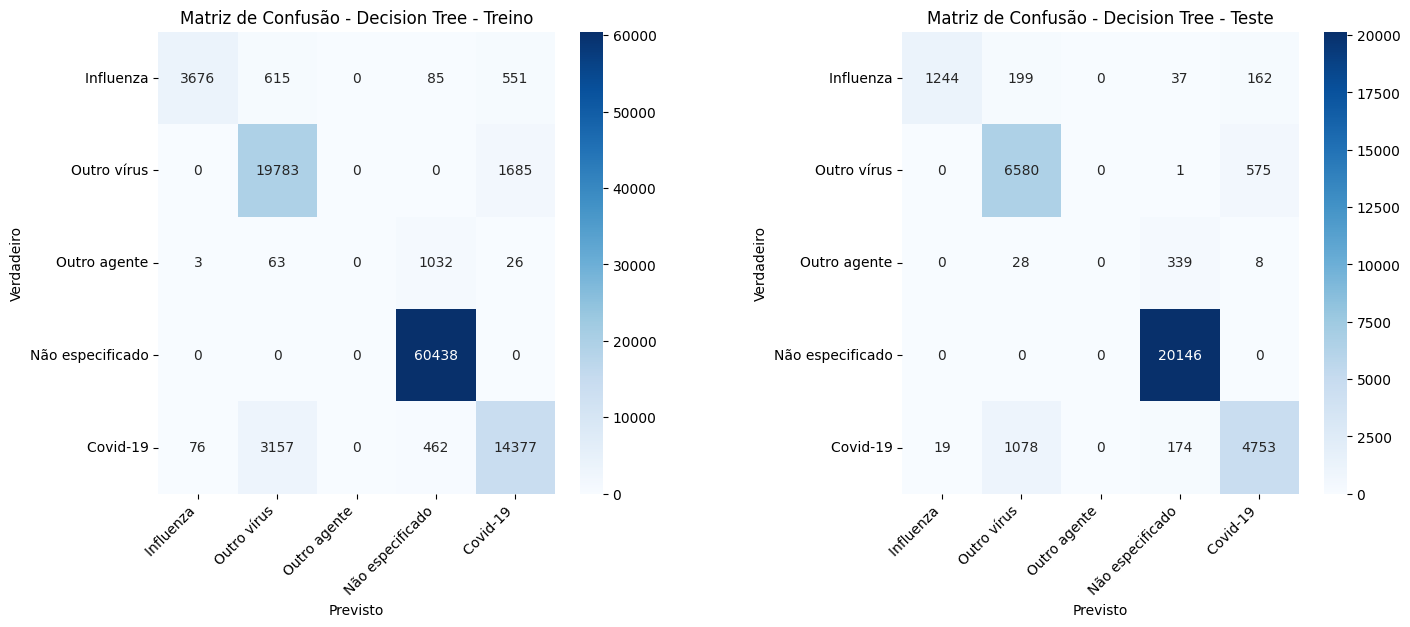

In [69]:
plot_matriz_confusao(best_model_tree, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Decision Tree')

## Random Forest

In [70]:
# Criação do Random forest.
var_rfc = RandomForestClassifier()

# Treinamento do modelo Random forest com os dados de treinamento.
var_rfc.fit(var_xTrain, var_yTrain)

plot_metricas(var_rfc, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Random Forest')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Métricas do Modelo --- Random Forest --- 



,Métrica,Treino,Teste
0,Acurácia,99.95%,93.79%
1,F-Medida,99.95%,93.32%
2,Precisão,99.95%,93.45%
3,Revocação,99.95%,93.79%
4,ROC AUC,100.00%,94.97%


### Grid Search

In [94]:
# Hiperparâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'min_samples_split': [10, 20],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 10]
}

grid_search_rfc = GridSearchCV(var_rfc,param_grid_rf, scoring= 'f1_macro', cv=3, n_jobs=-1)
grid_search_rfc.fit(var_xTrain, var_yTrain)

best_model_rfc = grid_search_rfc.best_estimator_
result_models_rfc = grid_search_rfc.cv_results_

plot_metricas(best_model_rfc, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Random Forest Best Model')

c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gustavo.belini_corte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,


Métricas do Modelo --- Random Forest Best Model --- 



,Métrica,Treino,Teste
0,Acurácia,93.55%,93.25%
1,F-Medida,92.97%,92.67%
2,Precisão,92.58%,92.27%
3,Revocação,93.55%,93.25%
4,ROC AUC,97.19%,95.27%


In [97]:
display(create_results_dataframe(grid_search_rfc))

,param,mean_test_score,std_test_score,params
0,"{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}",0.71671,0.001649,"{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}"


### Matriz de confusão e Curva Roc

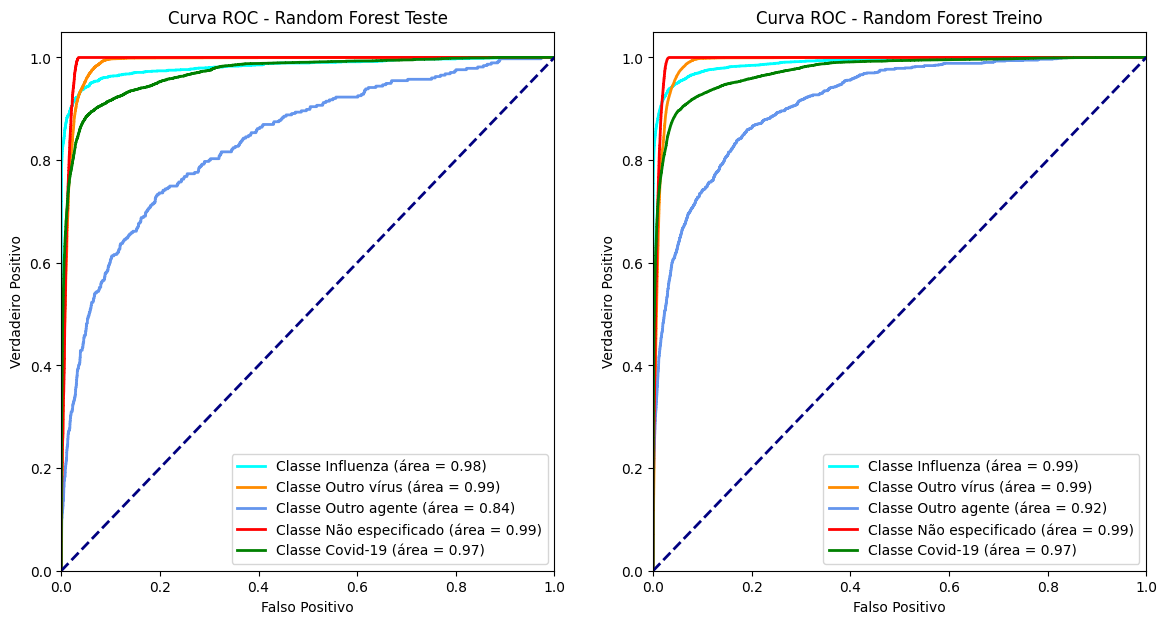

In [72]:
plot_curva_roc(best_model_rfc, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Random Forest')

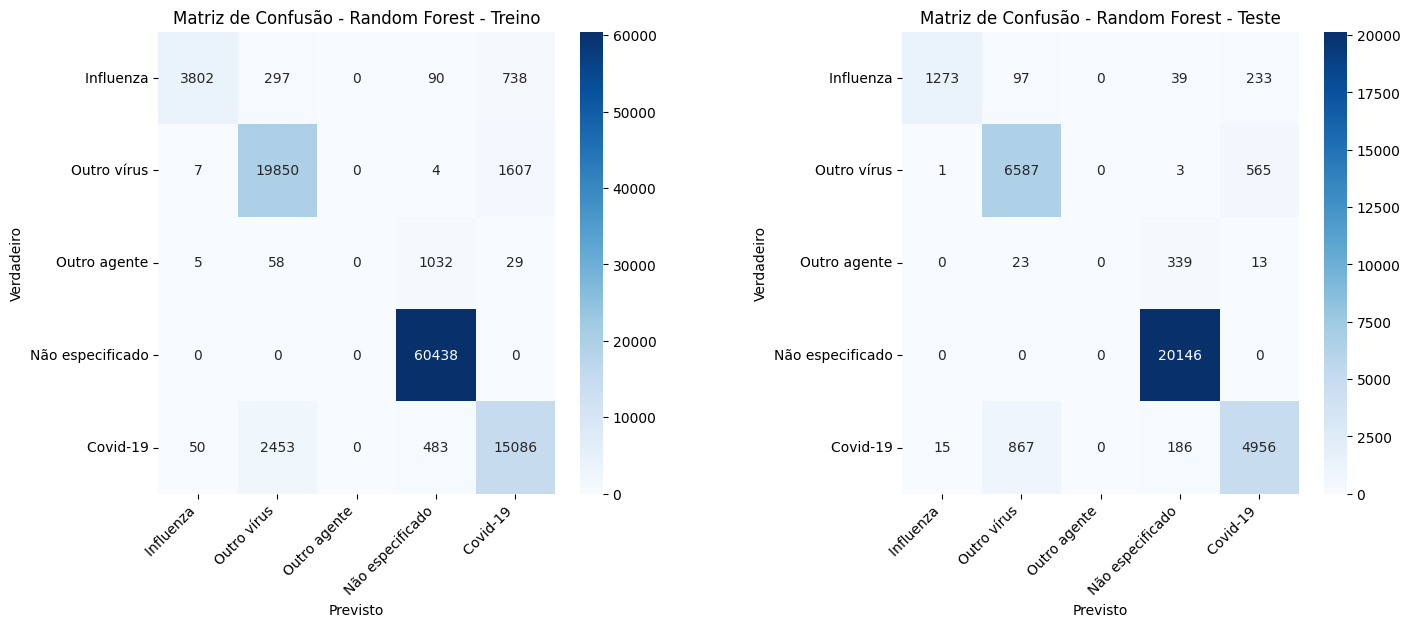

In [73]:
plot_matriz_confusao(best_model_rfc, var_xTrain, var_xTest, var_yTrain, var_yTest, 'Random Forest')

# Resultado geral de todos os modelos

In [113]:
# Chamando a função com o F score e roc de todos os Grid Search dos modelos

plot_metricas_modelos_organizado(var_xTrain, var_xTest, var_yTrain, var_yTest,
                                 best_model_lr, best_model_knn, best_nb, var_svc,
                                 best_model_gb, best_model_tree, best_model_rfc)



,Métricas,Regressão Logística,KNN,Naive Bayes,SVM,Gradient Boosting,Árvores de Decisão,Random Forest
0,F-Medida Treino,90.36%,99.95%,72.94%,92.17%,95.67%,92.09%,92.97%
1,F-Medida Teste,90.20%,82.06%,72.78%,90.95%,93.54%,91.99%,92.67%
2,ROC AUC Treino,93.60%,100.00%,81.27%,96.21%,99.07%,92.34%,97.19%
3,ROC AUC Teste,93.12%,81.72%,80.83%,93.16%,95.93%,92.04%,95.27%


In [114]:
# Função apenas para as variáveis normais sem o GridSearch

plot_metricas_modelos_organizado(var_xTrain, var_xTest, var_yTrain, var_yTest,
                                 var_lr, var_knn,var_nb, var_svc,
                                 var_gb, var_tree, var_rfc)


,Métricas,Regressão Logística,KNN,Naive Bayes,SVM,Gradient Boosting,Árvores de Decisão,Random Forest
0,F-Medida Treino,90.21%,84.54%,72.94%,92.17%,93.37%,99.95%,99.95%
1,F-Medida Teste,90.04%,78.72%,72.78%,90.95%,93.15%,90.01%,93.32%
2,ROC AUC Treino,92.84%,97.55%,81.27%,96.21%,96.63%,100.00%,100.00%
3,ROC AUC Teste,92.66%,81.42%,80.83%,93.16%,95.83%,84.73%,94.97%


In [105]:
print(var_gb)

GradientBoostingClassifier(random_state=2024)
